In [107]:
# import necessary libraies 

import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import seaborn as sns
import itertools
from collections import Counter
from pivottablejs import pivot_ui
import warnings

import dabl 

from pandas_profiling import ProfileReport

import mitosheet

import collections

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.style as style


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer



warnings.filterwarnings("ignore")
# %matplotlib inline

In [108]:
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use("ggplot")

In [109]:
# read the data

df= pd.read_csv('CIB_DEMO.csv',converters={'CIF_ID': str})
df2 = pd.read_csv("loans_G.csv",converters={'CIF_ID': str})
df3 = pd.read_excel('CIB TNR.xlsx',converters={'CUSTOMER ID': str})

In [110]:
df_z = df.copy()

In [111]:
df_z.AVERAGE_MONTHLY_BALANCE.fillna(0).clip(lower = 0).sum()

9421317406.48

In [112]:
#merge the dataframes
df3 = df3.rename(columns={'CUSTOMER ID': 'CIF_ID'})

df4 =pd.merge(df, df2, on='CIF_ID', how= 'left')
df_F =pd.merge(df4,df3, on='CIF_ID', how= 'left')

In [113]:
print(df.shape , df3.shape, df4.shape, df_F.shape)

(2433, 12) (24010, 22) (2433, 15) (22836, 36)


In [114]:
df_F['ACCOUNT OFFICER'] = df_F['ACCOUNT OFFICER'].astype('str')
df_F.YEAR = df_F.YEAR.astype('str')

> ### Create new necessary columns before further EDA

In [115]:
fixed_deposit = ['Fixed Deposits (LCY)', 'Fixed Deposits (FCY)']
Overdraft = ['Overdraft Accounts (LCY)', 'Overdraft Accounts (FCY)']
term_loans = ['Term Loans (LCY)', 'Term Loans (FCY)']
hire_purchase = ['Hire Purchase Loans (LCY)', 'Hire Purchase Loans (FCY)']
Account_fees = [ 'Account Fees - Ledger Fees',
       'Account Fees - Account Maintenance Fees',
       'Account Fees - Minimum balance Charges',
       'Account Fees - Additional Statement Charges']
Internet_banking = ['Internet Banking Income']
Comm = ['Comms On Accounts - Cheque Books',
       'Comms On Accounts - Cert Of Bal/Audit',
       'Comm Fin Instruments - Bankers Cheques',
       'Comm Collections - CTS Cheques', 'Comm Transfers - RTGS',
       "Comm Transfers - EFT's", 'Commission on Pesalink',
       'Comm Transfers - External Salaries',
       'Comm Transfers - Internal Salaries', 'Comm Transfers - I-Tax',
       'Comm Transfers - Standing Orders',
       'Comm Transfers - FX TT Issued', 'Comm Transfers - FX TT Received',
       'Comm Transfers - Rebates', 'Commissions - Cash Deposits',
       'Commissions - Cash Handling', 'Commissions - Others',
       "Comm Non Funded - Export LC's",
       'Comm Non Funded - Bills Acceptances',
       'Comm Non Funded - Guarantees']
Insurance_Premium = ['Insurance Premium Financing (LCY)',
       'Insurance Premium Financing (FCY)']
BTS = ['BTS Accounts (LCY)', 'BTS Accounts (FCY)']
PTS = ['PTS Accounts (LCY)',
       'PTS Accounts (FCY)']
Call_Deposit = ['Call Deposits (LCY)', 'Call Deposits (FCY)']

In [116]:
df_F['Product_Type'] = ['Fixed_Deposit' if x in fixed_deposit else 'Overdraft' if x in Overdraft
                     else 'Term_Loans' if x in term_loans else 'Hire_Purchase' if x in hire_purchase
                     else 'Account_Fees' if x in Account_fees else 'Internet_Banking' if x in Internet_banking
                     else 'Comms' if x in Comm else 'Insurance_Premium' if x in Insurance_Premium
                     else 'BTS' if x in BTS else 'PTS' if x in PTS
                     else 'Call_Deposit' if x in Call_Deposit else 'Others' for x in df_F['MRL DESCRIPTION']]

In [117]:
df_total_revenue_per_product = df_F.groupby(['CIF_ID', 'Product_Type']).agg({'BALANCE YTD': sum}).reset_index()

In [118]:
df_total_revenue_per_product['Total_Revenue_Per_Product'] = df_total_revenue_per_product['BALANCE YTD']

In [119]:
df_normed = df_total_revenue_per_product.pivot_table('Total_Revenue_Per_Product', ['CIF_ID'],
                                                     'Product_Type')

In [120]:
df_normed['CIF_ID'] = df_normed.index

In [121]:
df_normed.reset_index(drop=True,inplace=True)

In [122]:
df_normed.columns.name = 'S/No'

In [123]:
df_total_revenue = df_F.groupby(['CIF_ID']).agg({'BALANCE YTD': sum}).reset_index()

In [124]:
df_total_revenue.rename(columns = {'CUSTOMER ID': 'CIF_ID','BALANCE YTD': 'Total Revenue'}, inplace = True)

In [125]:
df_normed

S/No,Account_Fees,BTS,Call_Deposit,Comms,Fixed_Deposit,Hire_Purchase,Insurance_Premium,Internet_Banking,Others,Overdraft,PTS,Term_Loans,CIF_ID
0,"35,120.00",NaN,NaN,"3,156,290.79",NaN,"-1,662.11",NaN,NaN,"5,757,759.58","7,852,082.87","53,088.41","5,918,903.27",0001031
1,"51,350.00","31,798.43",NaN,"5,206,760.07",NaN,"139,567.79","148,750.22","738,820.00","11,849,929.10","8,786,239.90","135,034.80","5,831,565.66",0001038
2,"3,600.00",948.00,NaN,"3,250.00",NaN,NaN,NaN,NaN,NaN,NaN,14.86,NaN,0001046
3,"3,100.00","41,473.01",NaN,"2,500.00",NaN,NaN,NaN,NaN,0.48,NaN,"2,447.82",NaN,0001055
4,"56,300.00","58,272.84",NaN,"16,812,131.61",NaN,"332,837.58",NaN,NaN,"52,902,618.41","65,404,225.99","8,923.12","59,892,257.71",0001057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,NaN,27.39,NaN,"1,250.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0379354
2429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0379384
2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0379480
2431,NaN,NaN,NaN,"475,069.71",NaN,NaN,NaN,NaN,"4,591,629.47",NaN,NaN,NaN,8000046


In [126]:
df_F = pd.merge(df_F, df_total_revenue, how = 'left', on = 'CIF_ID')

In [127]:
df_F = pd.merge(df_F, df_normed, how = 'left', on = 'CIF_ID')

In [128]:
df_F = df_F.drop(columns=['JAN','FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC','BALANCE YTD']).drop_duplicates(subset='CIF_ID').reset_index(drop=True)

In [129]:
age_df = pd.read_csv('age.csv',converters={'CIF_ID': str})

In [130]:
df_F =pd.merge(df_F, age_df, on='CIF_ID', how= 'left')

In [131]:
numeric_cols = df_F.select_dtypes(include=[np.number]).columns
df_F[numeric_cols] = df_F[numeric_cols].fillna(0)
df_F[numeric_cols] = df_F[numeric_cols].clip(lower=0)


In [132]:
print(df_F.shape, df_F.CIF_ID.nunique())

(2433, 40) 2433


In [133]:
#Create new Tag
df_F['AVERAGE_MONTHLY_BALANCE'] = df_F['AVERAGE_MONTHLY_BALANCE'].apply(lambda x: x if x > 0 else 0)

In [134]:
def new_indicator(x):
    if x > 0:
        return '1'
    else:
        return '0'


df_F['Average_mb_tag'] = df_F['AVERAGE_MONTHLY_BALANCE'].apply(new_indicator)

In [135]:
mapping_df = pd.read_excel("Product mapping.xls")

In [136]:
mapping_df

,Product list,mapping,Applicable to CIB CUSTOMERS
0,ASSET FINANCE PUBLIC- EMI - FCY,Lending product,Yes
1,AGENCY BANKING PARTNERS - LCY,CASA-Current And Savings Account,Yes
2,OVERDRAFT - LCY,Lending product,Yes
3,BUSINESS SAPPHIRE - LCY,CASA-Current And Savings Account,Yes
4,ASSET FINANCE PUBLIC- EMI - LCY,Lending product,Yes
...,...,...,...
64,PAYGO-LCY,CASA-Current And Savings Account,No
65,SPECIAL CUSTODIAL TRADING ACCOUNT -FCY,High Cost Deposits,Yes
66,FOREIGN BILLS,Lending product,Yes
67,CHQ PURCHASED-CLS 91 - FCY,Lending product,Yes


In [137]:

unique_values = mapping_df['mapping'].unique()

# Create a dictionary for mapping product list to the corresponding value in the 'mapping' column
product_mapping = mapping_df.set_index('Product list')['mapping'].to_dict()

# Create a new column for each unique value and set the value to 1 if the product is in the 'PRODUCTLIST' column, otherwise, 0.
for value in unique_values:
    df_F[f"{value}"] = [1 if product_mapping.get(product) == value else 0 for product in df_F['PRODUCTLIST']]


In [138]:
df_F['default_status'] = df_F['MAX_DEFAULT'].apply(lambda x: 'late' if x <= 30 else ('WATCH' if 31 <= x <= 79 else 'defaulted'))

In [139]:
df_F['late'] = [1 if ('late' in x ) else 0 for x in df_F['default_status']]

In [140]:
df_F['WATCH'] = [1 if ('WATCH' in x ) else 0 for x in df_F['default_status']]

In [141]:
df_F['defaulted'] = [1 if ('defaulted' in x ) else 0 for x in df_F['default_status']]

In [142]:
#Check for duplicate ids
print(df_F.shape, df_F.CIF_ID.nunique())

(2433, 49) 2433


# EDA

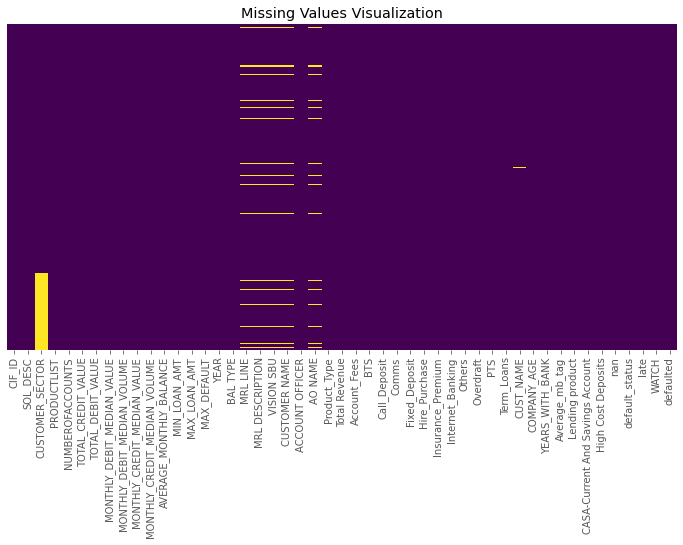

In [143]:
#check for null values

plt.figure(figsize=(12, 6))
sns.heatmap(df_F.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Visualization')
plt.show()

#### univariate analysis

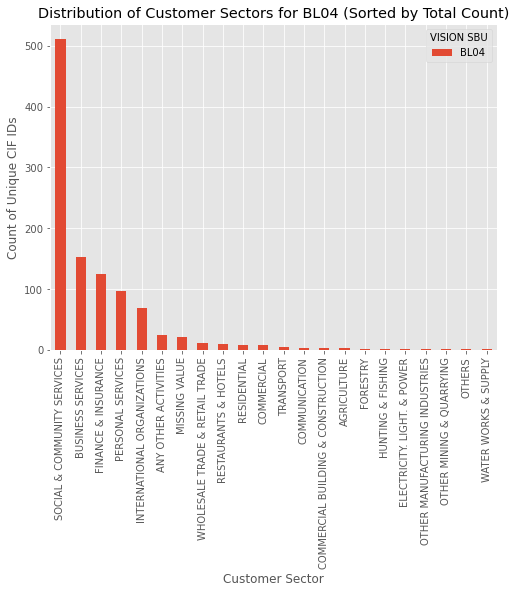

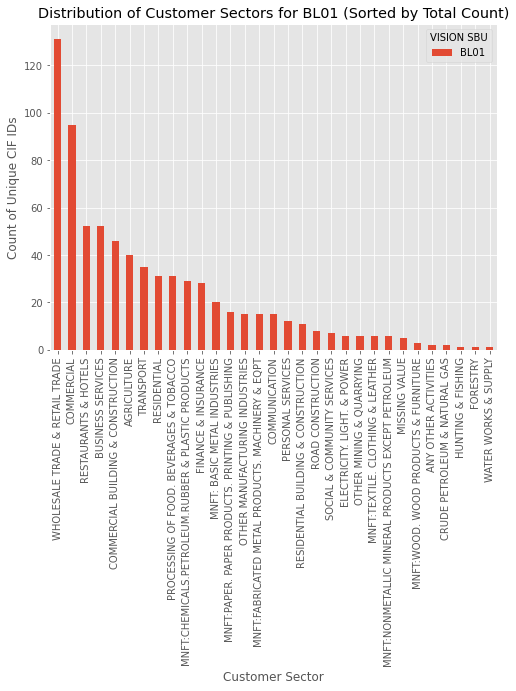

In [144]:

df_grouped = df_F.groupby(["VISION SBU", "CUSTOMER_SECTOR"])["CIF_ID"].nunique().to_frame("cnt_acs").reset_index()

sbu_counts = df_grouped["VISION SBU"].value_counts()
sbu_filter = sbu_counts[sbu_counts >= 5].index
df_filtered = df_grouped[df_grouped["VISION SBU"].isin(sbu_filter)]

table = pd.pivot_table(df_filtered, values="cnt_acs", index="CUSTOMER_SECTOR", columns="VISION SBU", fill_value=0)

sbu_counts = table.sum(axis=0).sort_values(ascending=False)

for sbu in sbu_counts.index:
    group = df_filtered[df_filtered["VISION SBU"] == sbu]

    table = pd.pivot_table(group, values="cnt_acs", index="CUSTOMER_SECTOR", columns="VISION SBU", fill_value=0)
   
    table = table.loc[table.sum(axis=1).sort_values(ascending=False).index]
   
    ax = table.plot(kind="bar", stacked=True, figsize=(8, 6))
    ax.set_xlabel("Customer Sector")
    ax.set_ylabel("Count of Unique CIF IDs")
    ax.set_title(f"Distribution of Customer Sectors for {sbu} (Sorted by Total Count)")
    ax.legend(title="VISION SBU")

plt.show()

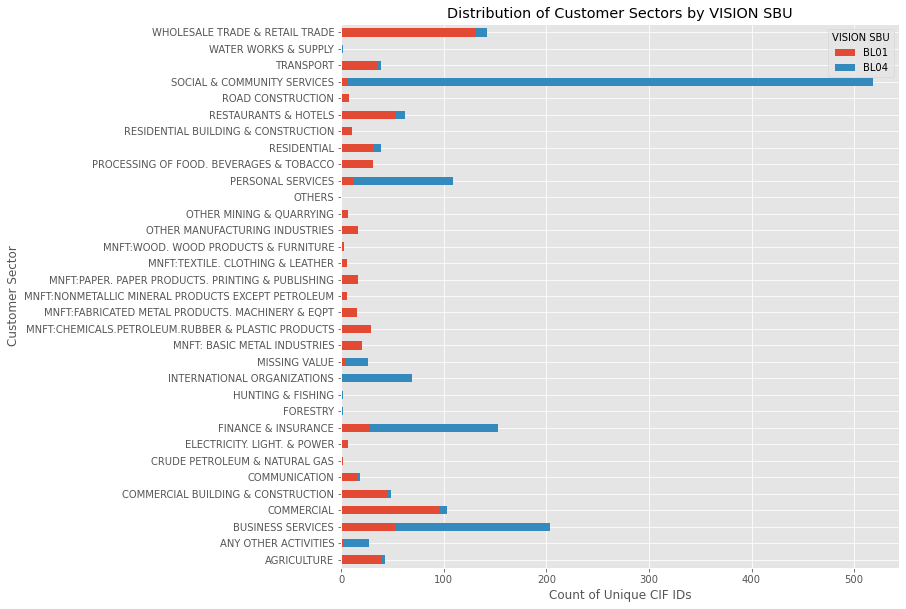

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

df_grouped = df_F.groupby(["VISION SBU", "CUSTOMER_SECTOR"])["CIF_ID"].nunique().to_frame("cnt_acs").reset_index()

sbu_counts = df_grouped["VISION SBU"].value_counts()
sbu_filter = sbu_counts[sbu_counts >= 5].index
df_filtered = df_grouped[df_grouped["VISION SBU"].isin(sbu_filter)]


table = pd.pivot_table(df_filtered, values="cnt_acs", index="CUSTOMER_SECTOR", columns="VISION SBU", fill_value=0)


ax = table.plot(kind="barh", stacked=True, figsize=(10, 10))
ax.set_xlabel("Count of Unique CIF IDs")
ax.set_ylabel("Customer Sector")
ax.set_title("Distribution of Customer Sectors by VISION SBU")
ax.legend(title="VISION SBU")

plt.show()

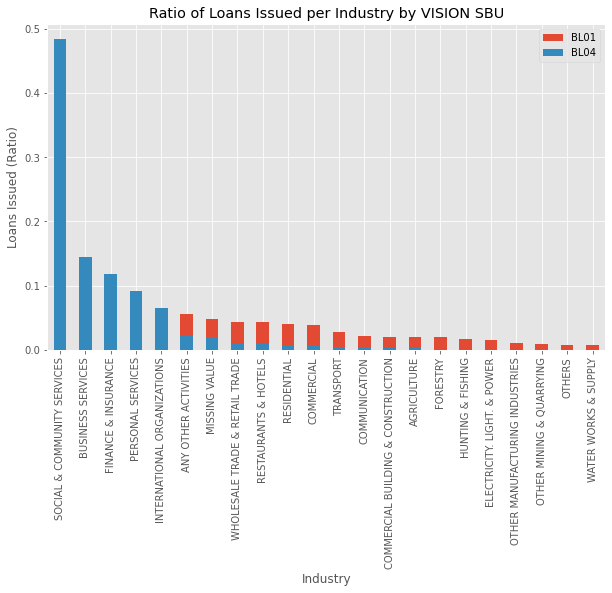

In [146]:


df_grouped = df_F.groupby(["VISION SBU", "CUSTOMER_SECTOR"])["CIF_ID"].nunique().to_frame("cnt_acs").reset_index()

sbu_counts = df_grouped["VISION SBU"].value_counts()
sbu_filter = sbu_counts[sbu_counts >= 5].index
df_filtered = df_grouped[df_grouped["VISION SBU"].isin(sbu_filter)]

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
for i, sbu in enumerate(sbu_filter):
    df_sbu = df_filtered[df_filtered["VISION SBU"] == sbu]
    df_sbu["prp"] = df_sbu["cnt_acs"] / df_sbu["cnt_acs"].sum()
    df_sorted = df_sbu.sort_values("prp", ascending=False)

    df_sorted.plot(x="CUSTOMER_SECTOR", y="prp", kind="bar", ax=ax, color=colors[i], label=sbu)
    ax.set_xlabel("Industry")
    ax.set_ylabel("Loans Issued (Ratio)")
    ax.set_title("Ratio of Loans Issued per Industry by VISION SBU")
    ax.legend()

plt.show()

In [147]:
df_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 0 to 2432
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CIF_ID                            2433 non-null   object 
 1   SOL_DESC                          2433 non-null   object 
 2   CUSTOMER_SECTOR                   1861 non-null   object 
 3   PRODUCTLIST                       2433 non-null   object 
 4   NUMBEROFACCOUNTS                  2433 non-null   int64  
 5   TOTAL_CREDIT_VALUE                2433 non-null   float64
 6   TOTAL_DEBIT_VALUE                 2433 non-null   float64
 7   MONTHLY_DEBIT_MEDIAN_VALUE        2433 non-null   float64
 8   MONTHLY_DEBIT_MEDIAN_VOLUME       2433 non-null   float64
 9   MONTHLY_CREDIT_MEDIAN_VALUE       2433 non-null   float64
 10  MONTHLY_CREDIT_MEDIAN_VOLUME      2433 non-null   float64
 11  AVERAGE_MONTHLY_BALANCE           2433 non-null   float64
 12  MIN_LO

In [148]:
# categorical columns
cat_cols = list(df_F.select_dtypes(include=['object', 'category']).columns)

# numerical columns
num_cols = list(df_F.select_dtypes(include=['int64', 'float64']).columns)

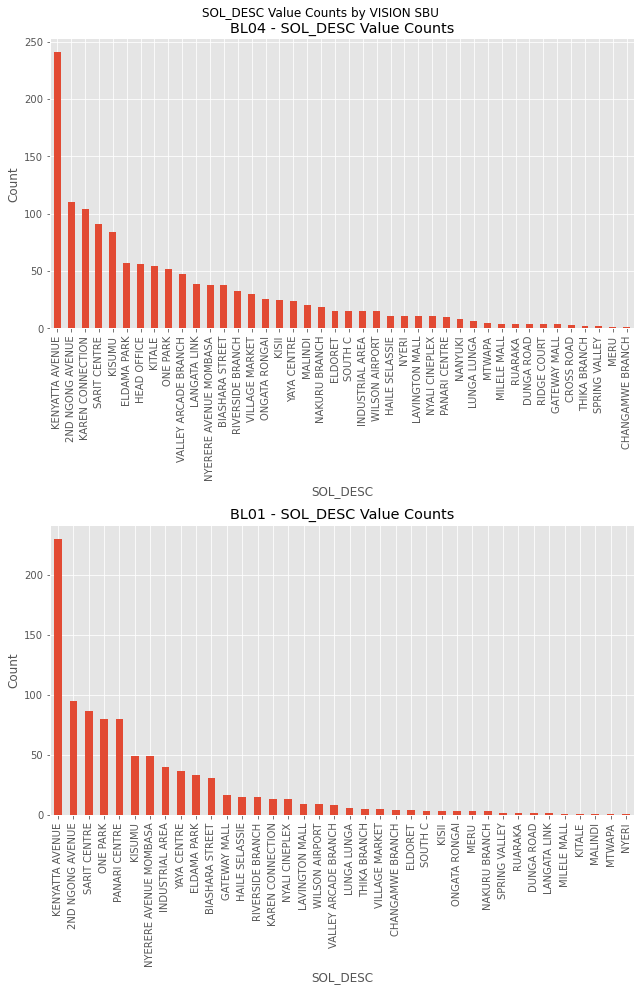

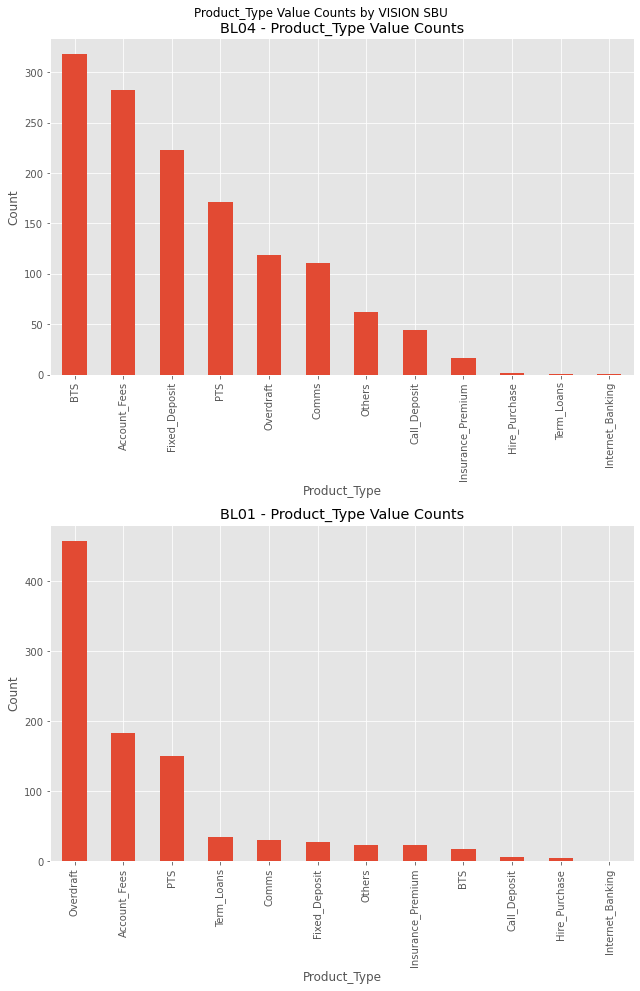

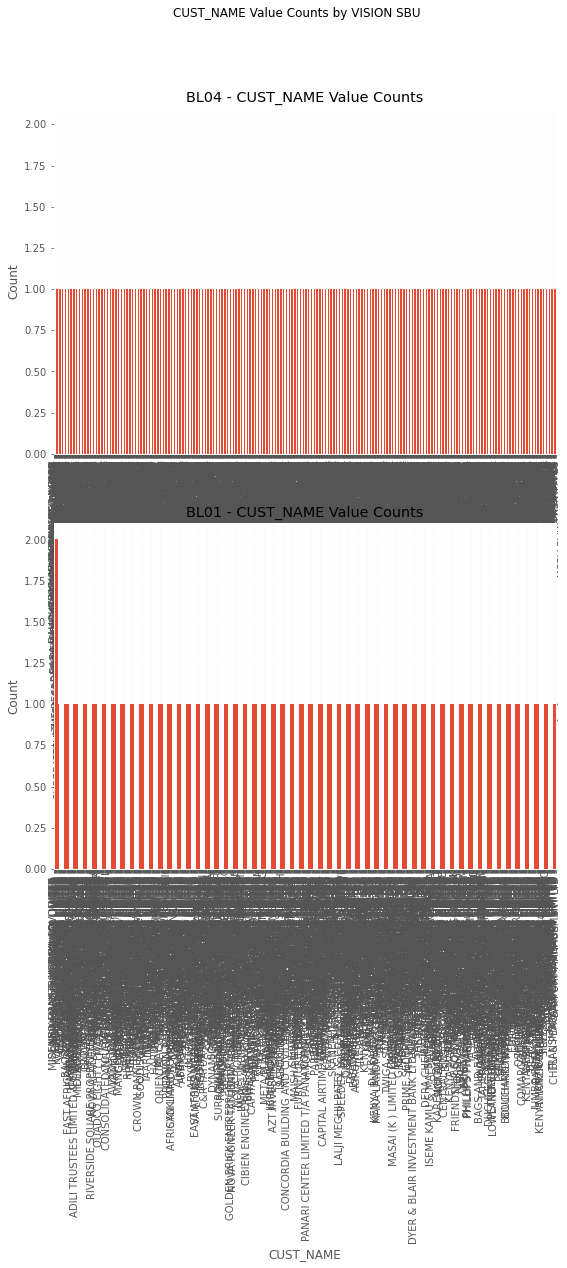

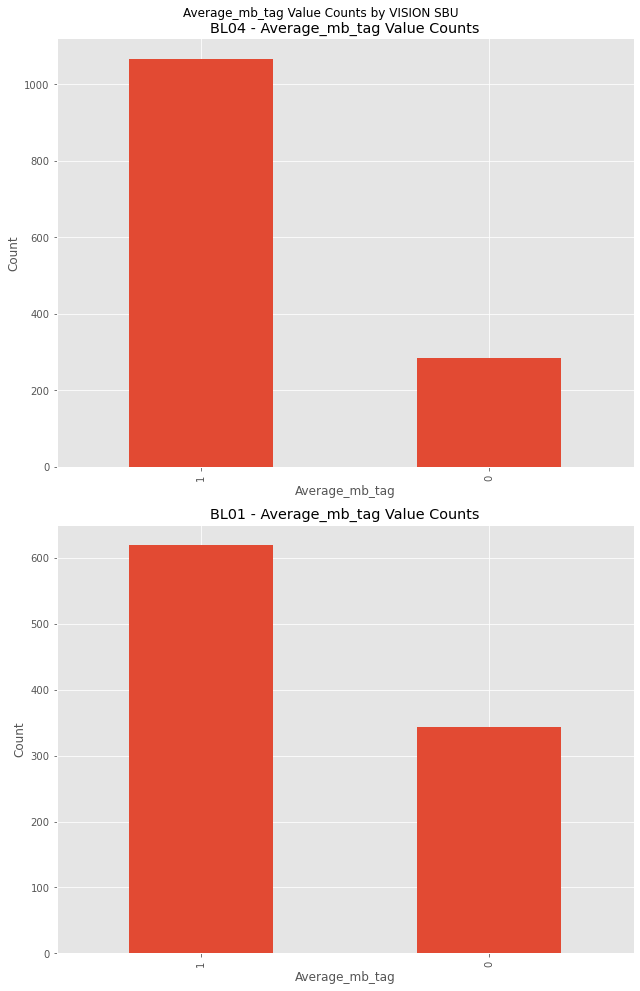

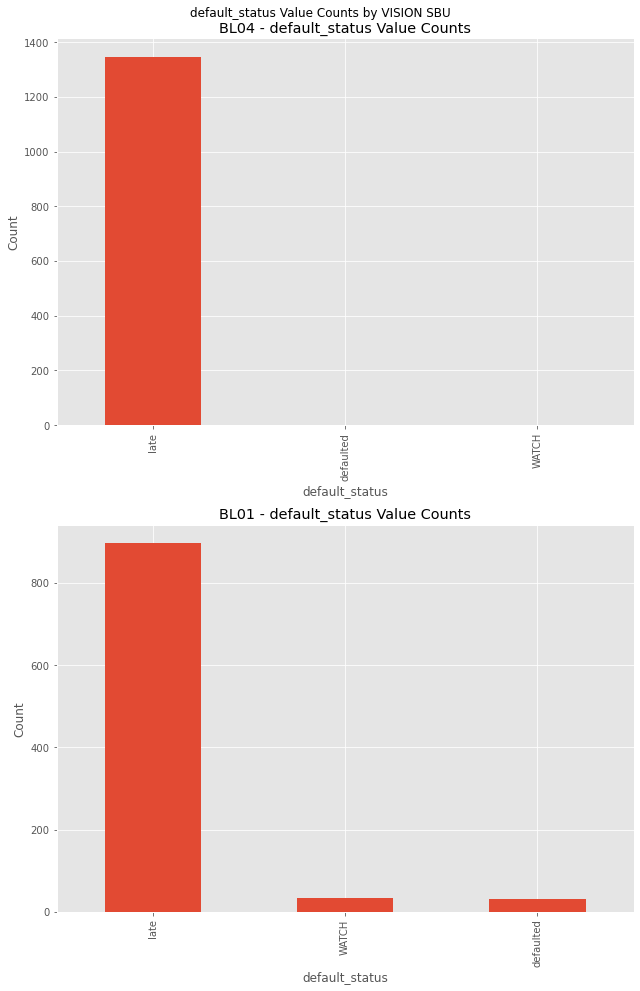

In [149]:
excluded_cols = ['CIF_ID', 'PRODUCTLIST', 'BAL TYPE','YEAR','MRL LINE', 'MRL DESCRIPTION', 'CUSTOMER NAME', 'ACCOUNT OFFICER', 'AO NAME','CUSTOMER_SECTOR']

# filter categorical columns by VISION SBU and exclude certain columns
categorical_columns = [col for col in cat_cols if col not in excluded_cols and col != "VISION SBU"]
sbu_counts = df_F["VISION SBU"].value_counts()
sbu_filter = sbu_counts[sbu_counts >= 5].index
df_filtered = df_F[df_F["VISION SBU"].isin(sbu_filter)]
    
for column in categorical_columns:
    fig, axes = plt.subplots(nrows=len(sbu_filter), ncols=1, figsize=(9, 7*len(sbu_filter)))
    fig.suptitle(column + " Value Counts by VISION SBU", fontsize=12)
    for i, sbu in enumerate(sbu_filter):
        ax = axes[i]
        sbu_df = df_filtered[df_filtered["VISION SBU"] == sbu]
        sbu_df[column].value_counts().plot(kind="bar", ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        ax.set_title(sbu + " - " + column + " Value Counts")
    plt.tight_layout()
    plt.show()


In [150]:
# # filter numerical columns by VISION SBU 
# excluded_cols = ['TOTAL_CREDIT_VALUE',
#  'TOTAL_DEBIT_VALUE',
#  'MONTHLY_DEBIT_MEDIAN_VALUE',
#  'MONTHLY_DEBIT_MEDIAN_VOLUME',
#  'MONTHLY_CREDIT_MEDIAN_VALUE',
#  'MONTHLY_CREDIT_MEDIAN_VOLUME',
#  'AVERAGE_MONTHLY_BALANCE',
#  'MIN_LOAN_AMT',
#  'MAX_LOAN_AMT',
#  'MAX_DEFAULT', 'Total Revenue','Median Revenue','Total Revenue',
#  'Median Revenue','defaulted','SAVINGS','Average Revenue','hirepurchase_revenue',
#  'fixed_deposit_products_revenue',
#  'other_list_revenue',
#  'agency_list_revenue',
#  'asset_finance_revenue',
#  'term_loan_revenue',
#  'short_term_loan_revenue',
#  'overdraft_revenue']

# # filter categorical columns by VISION SBU and exclude certain columns
# numerical_col = [col for col in num_cols if col not in excluded_cols]

# sbu_counts = df_F["VISION SBU"].value_counts()
# sbu_filter = sbu_counts[sbu_counts >= 5].index
# df_filtered = df_F[df_F["VISION SBU"].isin(sbu_filter)]
    
# for column in numerical_col:
#     fig, axes = plt.subplots(nrows=len(sbu_filter), ncols=1, figsize=(8, 6*len(sbu_filter)))
#     fig.suptitle(column + " Value Counts by VISION SBU", fontsize=16)
#     for i, sbu in enumerate(sbu_filter):
#         ax = axes[i]
#         sbu_df = df_filtered[df_filtered["VISION SBU"] == sbu]
#         sbu_df[column].value_counts().plot(kind="bar", ax=ax)
#         ax.set_xlabel(column)
#         ax.set_ylabel("Count")
#         ax.set_title(sbu + " - " + column + " Value Counts")
#     plt.show()

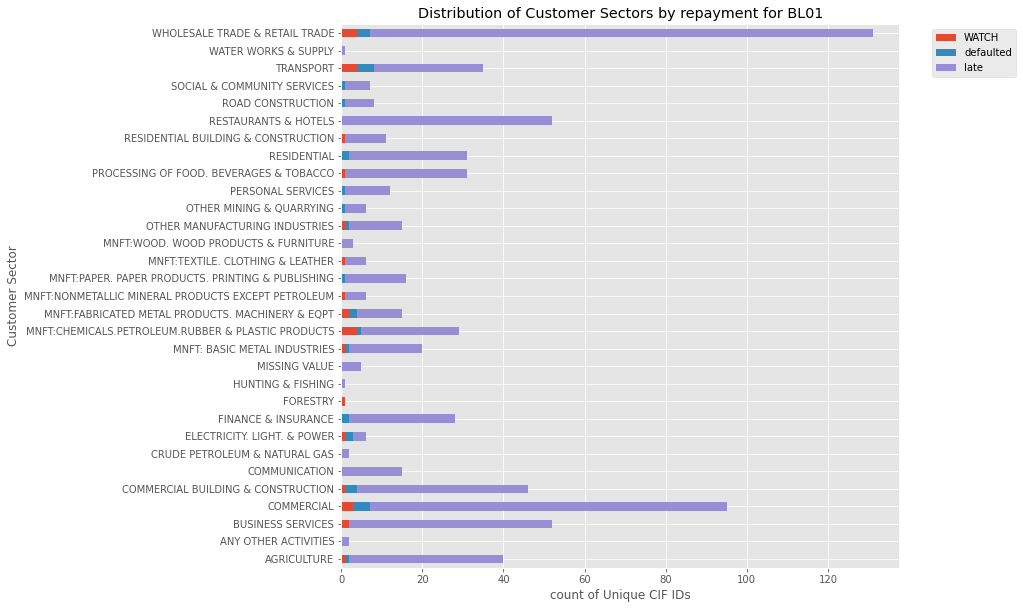

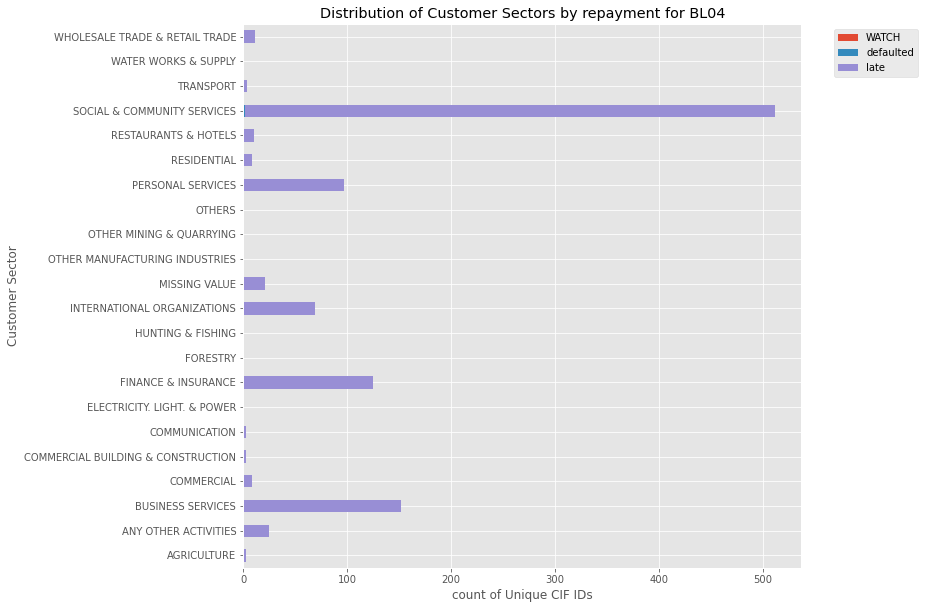

In [151]:
# group by VISION SBU and CUSTOMER_SECTOR, count unique CIF_IDs, and convert to dataframe
df_grouped = df_F.groupby(["VISION SBU", "default_status", "CUSTOMER_SECTOR"])["CIF_ID"].nunique().to_frame("cnt_acs").reset_index()

# filter out VISION SBUs with less than 5 sectors
sbu_counts = df_grouped["VISION SBU"].value_counts()
sbu_filter = sbu_counts[sbu_counts >= 5].index

# create stacked bar chart for each VISION SBU
for sbu in sbu_filter:
    sbu_df = df_grouped[df_grouped["VISION SBU"] == sbu]
    table = pd.pivot_table(sbu_df, values="cnt_acs", index="CUSTOMER_SECTOR", columns="default_status", fill_value=0)

    fig, ax = plt.subplots(figsize=(10, 10))
    table.plot(kind="barh", stacked=True, ax=ax)

    # format chart
    ax.set_xlabel("count of Unique CIF IDs")
    ax.set_ylabel("Customer Sector")
    ax.set_title(f"Distribution of Customer Sectors by repayment for {sbu}")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

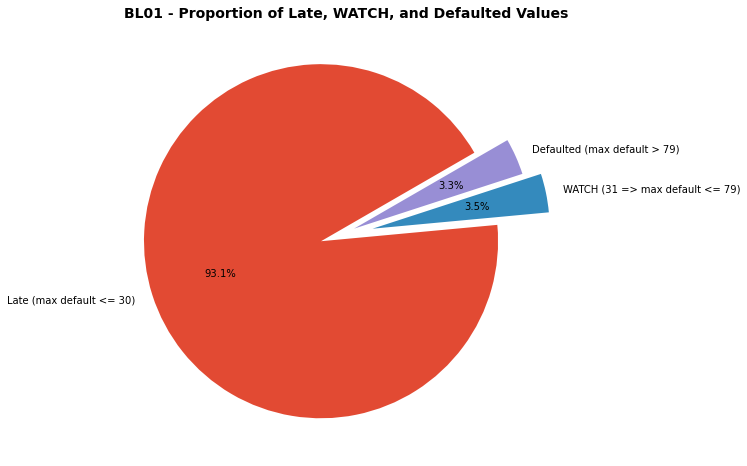

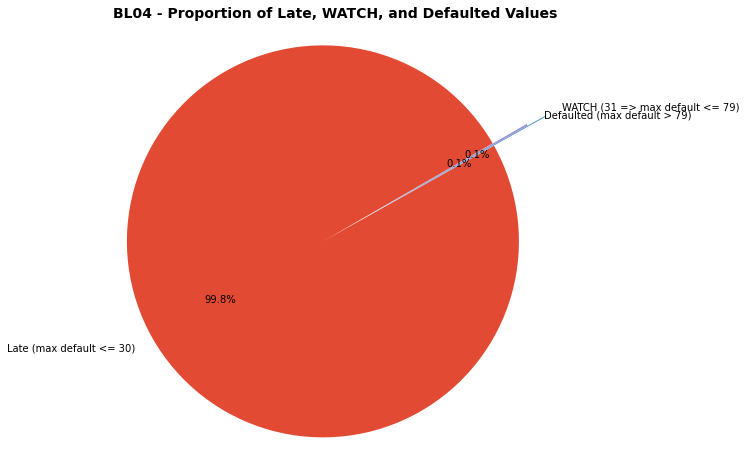

In [152]:
# group by default_status and VISION SBU, count unique CIF_IDs, and convert to dataframe
df_grouped = df_F.groupby(["default_status", "VISION SBU"])["CIF_ID"].nunique().to_frame("cnt_acs").reset_index()

# iterate through each unique value in VISION SBU
for sbu in df_grouped["VISION SBU"].unique():
    sbu_data = df_grouped[df_grouped["VISION SBU"] == sbu]
    
    # create pie chart for late, WATCH, and defaulted values
    count_late = sbu_data[sbu_data["default_status"] == 'late']["cnt_acs"].sum()
    count_watch = sbu_data[sbu_data["default_status"] == 'WATCH']["cnt_acs"].sum()
    count_defaulted = sbu_data[sbu_data["default_status"] == 'defaulted']["cnt_acs"].sum()

    count_late_pct = (count_late / sbu_data["cnt_acs"].sum()) * 100
    count_watch_pct = (count_watch / sbu_data["cnt_acs"].sum()) * 100
    count_defaulted_pct = (count_defaulted / sbu_data["cnt_acs"].sum()) * 100

    x = ['Late (max default <= 30)', 'WATCH (31 => max default <= 79)', 'Defaulted (max default > 79)']
    y = [count_late_pct, count_watch_pct, count_defaulted_pct]

    explode = (0.1, 0.2, 0.1)  # only "explode" the 1st slice

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', startangle=30)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(sbu + ' - Proportion of Late, WATCH, and Defaulted Values',fontsize=14, fontweight= 'bold')

plt.show()

# Check outlier Dist and Corr

In [153]:
from scipy import stats
# ['TOTAL_DEBIT_VALUE']
z = np.abs(stats.zscore(df.TOTAL_DEBIT_VALUE))

In [154]:
threshold = 3
df_tst = df_F[(z < threshold)]
#Data points with a Z-score greater than usually 2.5 or 3 are considered outliers it is why i am using 3

In [155]:
outliers = df_F.shape[0] - df_tst.shape[0], df_F.shape[1] - df_tst.shape[1]
outliers

(13, 0)

<AxesSubplot:>

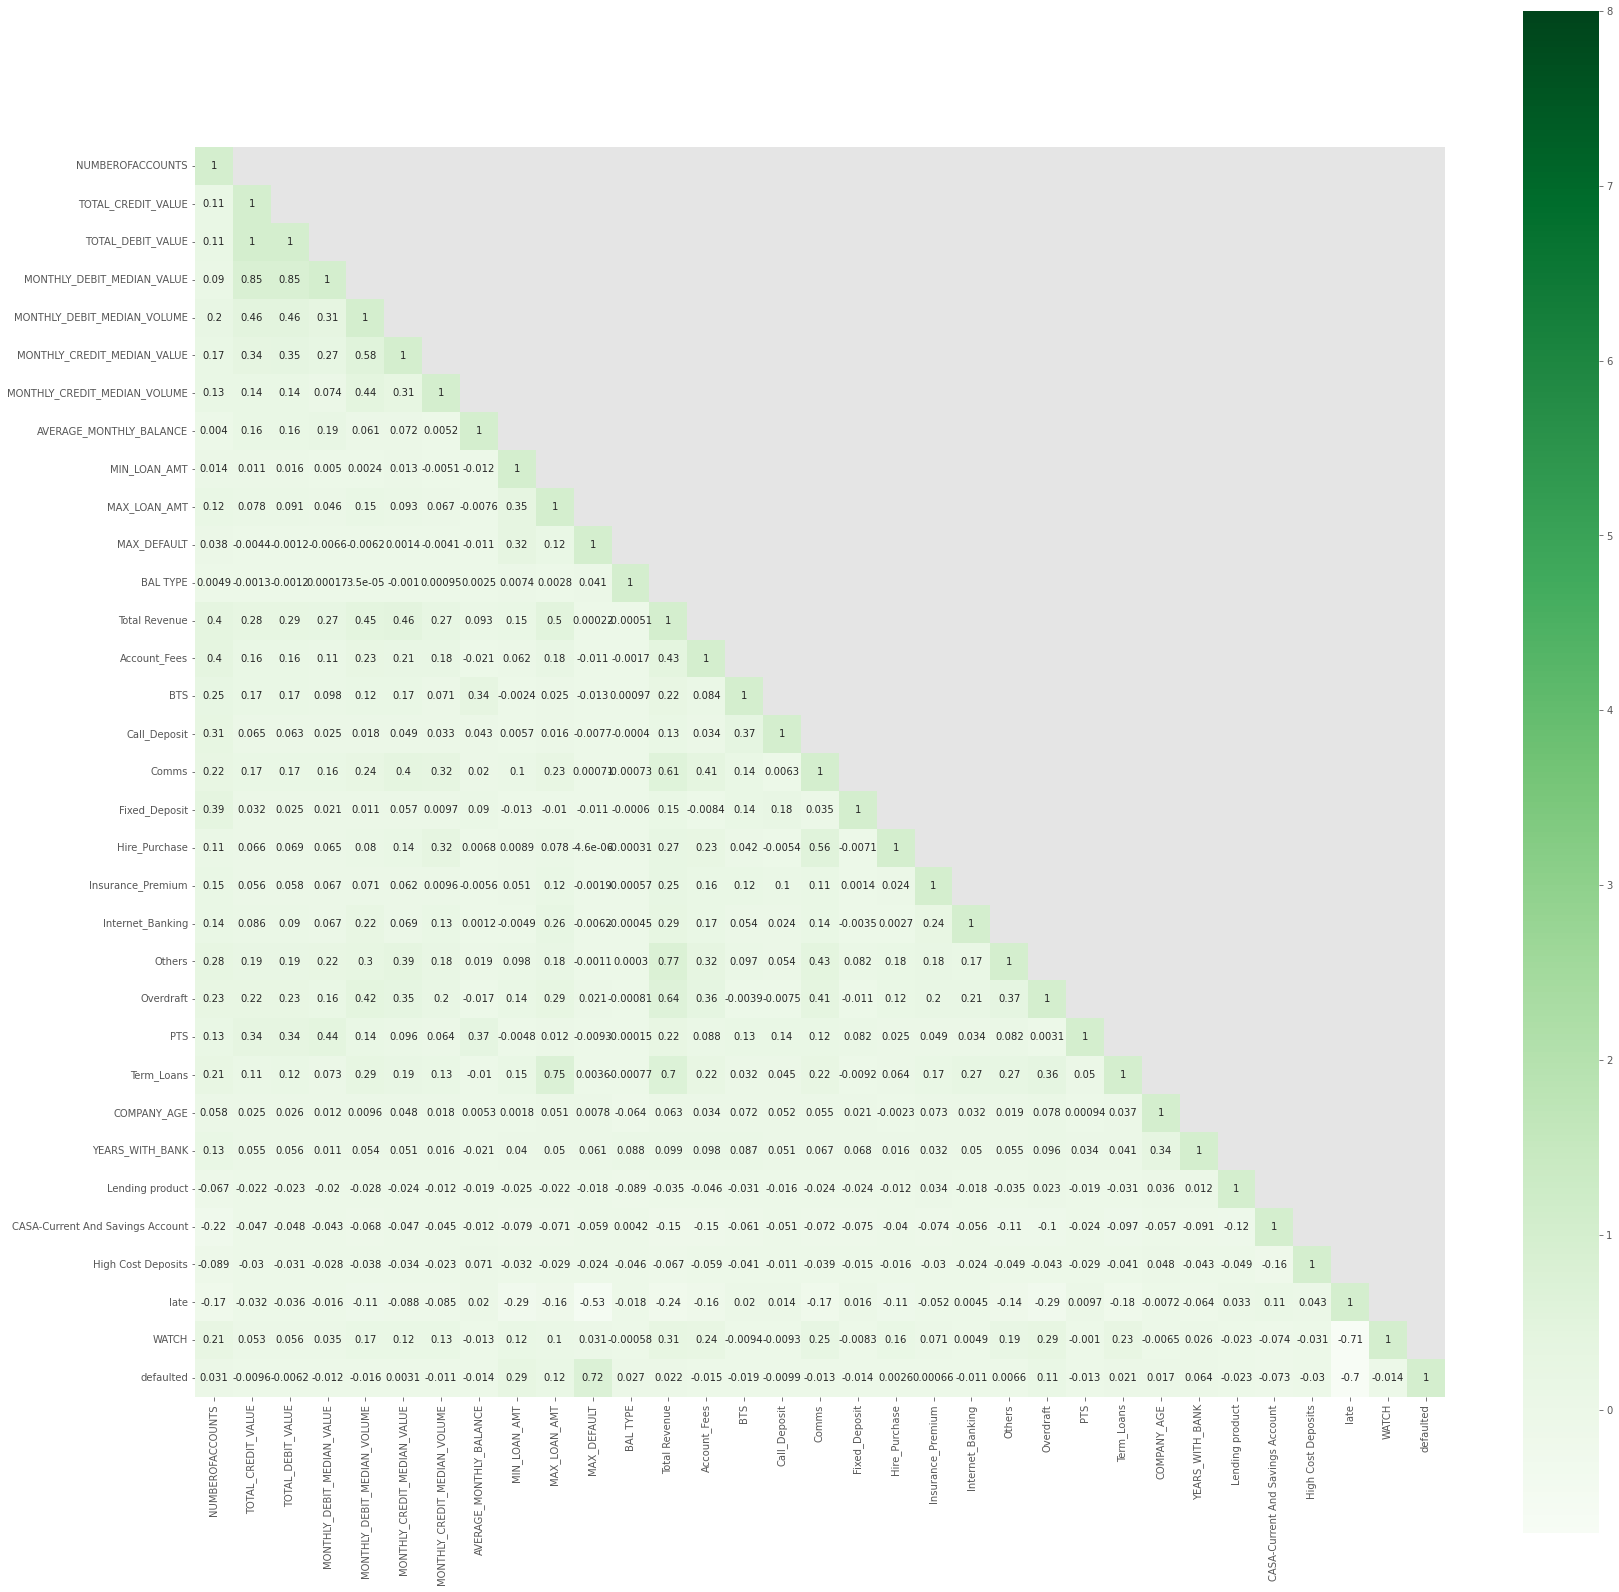

In [156]:
df_F_without_year = df_F.drop(columns= ['YEAR', 'nan'], axis=1)
corrMatt = df_F_without_year.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(corrMatt, cmap="Greens", mask=mask, vmax=8, square=True, annot=True)



In [157]:
#highest correlation 

corr0= df_F.corr().abs().unstack().sort_values(kind='quicksort')
corr0= corr0.dropna()
corr0= corr0[corr0 != 1.0]
corr0= corr0.drop_duplicates()
corr0

MAX_DEFAULT         Hire_Purchase                 0.00
BAL TYPE            MONTHLY_DEBIT_MEDIAN_VOLUME   0.00
PTS                 BAL TYPE                      0.00
BAL TYPE            MONTHLY_DEBIT_MEDIAN_VALUE    0.00
Total Revenue       MAX_DEFAULT                   0.00
                                                  ... 
MAX_LOAN_AMT        Term_Loans                    0.75
Others              Total Revenue                 0.77
TOTAL_DEBIT_VALUE   MONTHLY_DEBIT_MEDIAN_VALUE    0.85
TOTAL_CREDIT_VALUE  MONTHLY_DEBIT_MEDIAN_VALUE    0.85
                    TOTAL_DEBIT_VALUE             1.00
Length: 528, dtype: float64

In [158]:
top10_T0= corr0.tail(10)
top10_T0

Total Revenue       Overdraft                    0.64
late                defaulted                    0.70
Term_Loans          Total Revenue                0.70
late                WATCH                        0.71
defaulted           MAX_DEFAULT                  0.72
MAX_LOAN_AMT        Term_Loans                   0.75
Others              Total Revenue                0.77
TOTAL_DEBIT_VALUE   MONTHLY_DEBIT_MEDIAN_VALUE   0.85
TOTAL_CREDIT_VALUE  MONTHLY_DEBIT_MEDIAN_VALUE   0.85
                    TOTAL_DEBIT_VALUE            1.00
dtype: float64

In [159]:
from scipy.stats import zscore

# Compute the z-scores for the TOTAL_CREDIT_VALUE column
df_F['TOTAL_CREDIT_VALUE_zscore'] = zscore(df_F['TOTAL_CREDIT_VALUE'])

# Identify any data points with a z-score greater than 3 as outliers
df_F = df_F[df_F['TOTAL_CREDIT_VALUE_zscore'] < 3]

In [160]:
df_F.shape

(2420, 50)

In [161]:

from scipy.stats import zscore

df_F['AVERAGE_MONTHLY_BALANCE_zscore'] = zscore(df_F['AVERAGE_MONTHLY_BALANCE'])

df_F = df_F[df_F['AVERAGE_MONTHLY_BALANCE_zscore'] < 3]

In [162]:
df_F.shape

(2412, 51)

In [173]:
df_copy = df_F.copy()

In [174]:
df_copy.drop(columns = ['MRL LINE','YEAR','ACCOUNT OFFICER', 'BAL TYPE','PRODUCTLIST'], axis=1, inplace=True)

# Preprocessing

In [178]:
df_copy.isnull().sum()

CIF_ID                                0
SOL_DESC                              0
CUSTOMER_SECTOR                     566
NUMBEROFACCOUNTS                      0
TOTAL_CREDIT_VALUE                    0
TOTAL_DEBIT_VALUE                     0
MONTHLY_DEBIT_MEDIAN_VALUE            0
MONTHLY_DEBIT_MEDIAN_VOLUME           0
MONTHLY_CREDIT_MEDIAN_VALUE           0
MONTHLY_CREDIT_MEDIAN_VOLUME          0
AVERAGE_MONTHLY_BALANCE               0
MIN_LOAN_AMT                          0
MAX_LOAN_AMT                          0
MAX_DEFAULT                           0
MRL DESCRIPTION                     121
VISION SBU                          121
CUSTOMER NAME                       121
AO NAME                             121
Product_Type                          0
Total Revenue                         0
Account_Fees                          0
BTS                                   0
Call_Deposit                          0
Comms                                 0
Fixed_Deposit                         0


In [165]:
#create better features

In [176]:
df_copy['credit_VALUE_TO_VOLUME_RATIO'] = df_copy['TOTAL_CREDIT_VALUE'] / df_copy['MONTHLY_CREDIT_MEDIAN_VOLUME']
df_copy['credit_VALUE_TO_VOLUME_RATIO'] = df_copy['credit_VALUE_TO_VOLUME_RATIO'].replace([np.inf, -np.inf, np.nan], 0)

In [177]:
df_copy['debit_VALUE_TO_VOLUME_RATIO'] = df_copy['TOTAL_DEBIT_VALUE'] / df_copy['MONTHLY_DEBIT_MEDIAN_VOLUME']
df_copy['debit_VALUE_TO_VOLUME_RATIO'] = df_copy['debit_VALUE_TO_VOLUME_RATIO'].replace([np.inf, -np.inf, np.nan], 0)


In [168]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
NUMBEROFACCOUNTS,"2,412.00",3.64,7.59,1.00,1.00,2.00,4.00,225.00
TOTAL_CREDIT_VALUE,"2,412.00","813,666,379.47","3,205,945,859.42",0.00,"714,639.99","18,544,371.93","275,242,143.46","39,775,345,027.13"
TOTAL_DEBIT_VALUE,"2,412.00","828,948,529.17","3,249,737,908.56",0.00,"102,301.57","15,057,194.78","276,569,053.79","40,542,513,881.98"
MONTHLY_DEBIT_MEDIAN_VALUE,"2,412.00","20,444,881.21","107,448,699.86",0.00,0.00,"170,412.96","3,529,326.62","2,403,263,032.77"
MONTHLY_DEBIT_MEDIAN_VOLUME,"2,412.00",13.62,42.88,0.00,0.00,1.50,8.12,"1,051.50"
MONTHLY_CREDIT_MEDIAN_VALUE,"2,412.00","8,178,861.72","53,199,072.88",0.00,0.00,"20,065.00","705,692.50","1,525,524,341.17"
MONTHLY_CREDIT_MEDIAN_VOLUME,"2,412.00",21.43,227.42,0.00,0.00,1.00,3.00,"7,764.50"
AVERAGE_MONTHLY_BALANCE,"2,412.00","2,453,163.96","7,528,333.58",0.00,0.00,"223,670.46","1,672,113.05","90,690,394.32"
MIN_LOAN_AMT,"2,412.00","6,478,796.92","50,455,169.32",0.00,0.00,0.00,0.00,"1,039,796,336.14"
MAX_LOAN_AMT,"2,412.00","17,802,841.05","157,541,857.06",0.00,0.00,0.00,0.00,"6,255,080,151.95"


In [179]:

features_to_scale = ['AVERAGE_MONTHLY_BALANCE', 'Total Revenue']
df_features = df_copy[features_to_scale]


In [180]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [181]:
df_scaled_features = pd.DataFrame(scaled_features, columns=features_to_scale)

df_copy[features_to_scale] = df_scaled_features


In [184]:
df_copy.T

,0,1,2,3,5,6,7,8,9,10,...,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432
CIF_ID,0001031,0001038,0001046,0001055,0001062,0001063,0001068,0001069,0001134,0001179,...,0378734,0378819,0378960,0378987,0379324,0379354,0379384,0379480,8000046,8000047
SOL_DESC,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,...,ONE PARK,HEAD OFFICE,INDUSTRIAL AREA,2ND NGONG AVENUE,ONE PARK,HAILE SELASSIE,NYERERE AVENUE MOMBASA,ONE PARK,HEAD OFFICE,HEAD OFFICE
CUSTOMER_SECTOR,MNFT:PAPER. PAPER PRODUCTS. PRINTING & PUBLISHING,PROCESSING OF FOOD. BEVERAGES & TOBACCO,MNFT:TEXTILE. CLOTHING & LEATHER,MNFT:PAPER. PAPER PRODUCTS. PRINTING & PUBLISHING,MNFT:TEXTILE. CLOTHING & LEATHER,PERSONAL SERVICES,MNFT:PAPER. PAPER PRODUCTS. PRINTING & PUBLISHING,SOCIAL & COMMUNITY SERVICES,MNFT:CHEMICALS.PETROLEUM.RUBBER & PLASTIC PROD...,PERSONAL SERVICES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING VALUE,MISSING VALUE
NUMBEROFACCOUNTS,18,19,2,2,4,6,10,1,4,17,...,2,1,2,1,2,1,3,2,1,1
TOTAL_CREDIT_VALUE,"2,294,274,443.62","6,970,173,219.11","3,819,742.48","152,966,095.38","2,985,109,630.09","103,478,331.04","18,843,862,470.13","894,384.96","28,497,668.98","949,578,470.60",...,0.00,"14,400,000.00","19,749.00","1,551,813.40","301,000.00","107,700.00","16,125,397.22","303,000.00",0.00,0.00
TOTAL_DEBIT_VALUE,"2,420,203,981.51","7,239,817,224.19","3,734,391.00","152,821,226.39","3,022,269,752.76","91,103,119.98","18,172,192,830.20",0.00,"28,382,548.00","641,198,152.66",...,0.00,0.00,850.00,0.00,"87,000.00","3,850.00","22,124,495.14","103,056.99",0.00,0.00
MONTHLY_DEBIT_MEDIAN_VALUE,"65,955,952.11","143,928,226.29","3,600.00","500,000.00","54,589,724.59","805,835.50","398,574,931.97",0.00,"900,000.00","1,116,412.00",...,0.00,0.00,0.00,0.00,0.00,"2,750.00",0.00,0.00,0.00,0.00
MONTHLY_DEBIT_MEDIAN_VOLUME,92.00,134.50,1.00,1.00,16.50,7.50,111.50,0.00,2.00,4.50,...,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
MONTHLY_CREDIT_MEDIAN_VALUE,"3,516,725.38","52,650,157.53",0.00,"1,023,500.00","41,904,596.60","787,741.00","178,037,553.00",0.00,0.00,"3,613,835.50",...,0.00,0.00,"1,010.00",0.00,0.00,"62,000.00",0.00,0.00,0.00,0.00
MONTHLY_CREDIT_MEDIAN_VOLUME,72.50,27.50,0.00,1.50,10.50,27.00,40.50,0.00,0.00,14.00,...,0.00,0.00,3.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


# Modelling <br>


In [185]:
users = pd.DataFrame(df_copy['CIF_ID'].unique())
users.columns = ['CIF_ID']
users.head()

,CIF_ID
0,0001031
1,0001038
2,0001046
3,0001055
4,0001062


In [186]:
# Add ranks to the DataFrame
const_value = 1e-6  # choose a small value to add

# Rank 'AVERAGE_MONTHLY_BALANCE'
rank_array = df_copy['AVERAGE_MONTHLY_BALANCE'].values + const_value
rank = pd.Series(rank_array).rank(ascending=True)
normalized_rank = rank / rank.max() * 100
users['AVERAGE_MONTHLY_BALANCE_rank'] = normalized_rank

# Rank 'Average Revenue'
rank_array = df_copy['Total Revenue'].values + const_value
rank = pd.Series(rank_array).rank(ascending=True)
normalized_rank = rank / rank.max() * 100
users['Total Revenue_rank'] = normalized_rank

# Rank 'credit_VALUE_TO_VOLUME_RATIO'
rank_array = df_copy['credit_VALUE_TO_VOLUME_RATIO'].values + const_value
rank = pd.Series(rank_array).rank(ascending=True)
normalized_rank = rank / rank.max() * 100
users['credit_VALUE_TO_VOLUME_RATIO_rank'] = normalized_rank

# Rank 'debit_VALUE_TO_VOLUME_RATIO'
rank_array = df_copy['debit_VALUE_TO_VOLUME_RATIO'].values + const_value
rank = pd.Series(rank_array).rank(ascending=True)
normalized_rank = rank / rank.max() * 100
users['debit_VALUE_TO_VOLUME_RATIO_rank'] = normalized_rank

# Calculate scores and round off to nearest integer
users['Score'] = users[['AVERAGE_MONTHLY_BALANCE_rank', 'Total Revenue_rank', 'credit_VALUE_TO_VOLUME_RATIO_rank', 'debit_VALUE_TO_VOLUME_RATIO_rank']].sum(axis=1).round(0)


In [187]:
users.sample(3)

,CIF_ID,AVERAGE_MONTHLY_BALANCE_rank,Total Revenue_rank,credit_VALUE_TO_VOLUME_RATIO_rank,debit_VALUE_TO_VOLUME_RATIO_rank,Score
1834,0190159,62.65,54.45,20.63,16.23,154.00
862,0068149,15.16,8.99,93.78,87.65,206.00
671,0049773,48.98,37.56,20.63,51.53,159.00


In [188]:
users.Score.describe()

count   2,412.00
mean      199.22
std        73.32
min        37.00
25%       145.00
50%       198.00
75%       253.00
max       384.00
Name: Score, dtype: float64

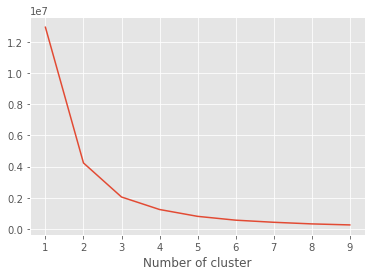

In [189]:
sse={}
fm_band = users[['Score']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(fm_band)
    fm_band["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [190]:
kmeans = KMeans(n_clusters=3)
users['cluster Band'] = kmeans.fit_predict(users[['Score']])

In [191]:
users['cluster Band'].value_counts()

0    993
2    783
1    636
Name: cluster Band, dtype: int64

In [262]:
merged_df = pd.merge(users, df_F, on='CIF_ID')

In [263]:
merged_df['Band_name']=np.where(merged_df['cluster Band'] == 1 ,"High Value Customer",(np.where(merged_df['cluster Band']== 0 ,"Medium Value Customer" ,"Low value Customer" )))


In [266]:
total_revenue_by_cluster = merged_df.groupby("Band_name")["Total Revenue"].sum()

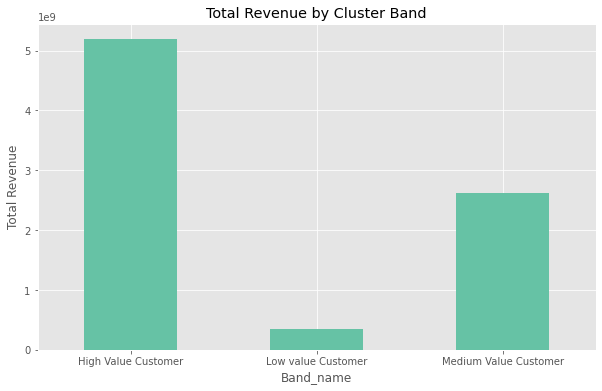

In [267]:
ax = total_revenue_by_cluster.plot(kind="bar", colormap="Set2", figsize=(10, 6))
ax.set_ylabel("Total Revenue")
ax.set_title("Total Revenue by Cluster Band")
plt.xticks(rotation=0)
plt.show()

# EDA of the different bands

In [204]:
# compare transaction volume by diff clusters

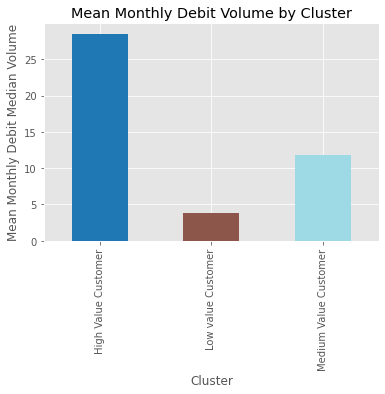

In [312]:
# group the data by cluster and calculate the mean debit median volume for each cluster
cluster_volume = merged_df.groupby('Band_name')['MONTHLY_DEBIT_MEDIAN_VOLUME'].mean()

# plot the mean monthly debit median volume for each cluster
cluster_volume.plot(kind='bar',color=colors)
plt.xlabel('Cluster')
plt.ylabel('Mean Monthly Debit Median Volume')
plt.title('Mean Monthly Debit Volume by Cluster')
plt.show()



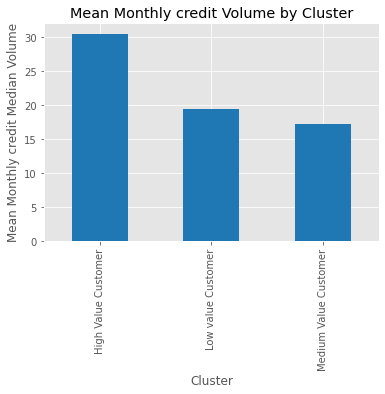

In [206]:
cluster_volume = merged_df.groupby('Band_name')['MONTHLY_CREDIT_MEDIAN_VOLUME'].mean()

cluster_volume.plot(kind='bar', colormap='tab10')
plt.xlabel('Cluster')
plt.ylabel('Mean Monthly credit Median Volume')
plt.title('Mean Monthly credit Volume by Cluster')
plt.show()


In [207]:
 # analyze the average transaction amount for each cluster

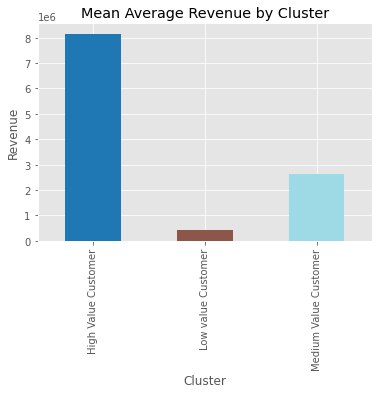

In [314]:

cluster_revenue = merged_df.groupby('Band_name')['Total Revenue'].mean()

cmap = mcolors.ListedColormap(plt.cm.viridis.colors)

unique_clusters = merged_df['Band_name'].unique()
color_dict = {cluster: cmap(idx) for idx, cluster in enumerate(unique_clusters)}

cluster_revenue.plot(kind='bar', color=colors)

plt.xlabel('Cluster')
plt.ylabel('Revenue')
plt.title('Mean Average Revenue by Cluster')
plt.show()


In [330]:
merged_df2.describe()

,AVERAGE_MONTHLY_BALANCE_rank,Total Revenue_rank,credit_VALUE_TO_VOLUME_RATIO_rank,debit_VALUE_TO_VOLUME_RATIO_rank,Score,cluster Band,NUMBEROFACCOUNTS,TOTAL_CREDIT_VALUE,TOTAL_DEBIT_VALUE,MONTHLY_DEBIT_MEDIAN_VALUE,...,CASA-Current And Savings Account,High Cost Deposits,nan,late,WATCH,defaulted,TOTAL_CREDIT_VALUE_zscore,AVERAGE_MONTHLY_BALANCE_zscore,credit_VALUE_TO_VOLUME_RATIO,debit_VALUE_TO_VOLUME_RATIO
count,"2,391.00","2,391.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00",...,"2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00"
mean,50.02,50.02,50.02,50.02,199.22,0.91,3.64,"813,666,379.47","828,948,529.17","20,444,881.21",...,0.28,0.06,0.00,0.97,0.01,0.01,-0.06,-0.04,"152,878,953.04","69,627,472.60"
std,28.47,28.87,27.84,28.38,73.32,0.85,7.59,"3,205,945,859.42","3,249,737,908.56","107,448,699.86",...,0.45,0.24,0.00,0.17,0.12,0.12,0.23,0.25,"770,414,720.38","269,307,814.58"
min,15.16,3.81,20.63,16.23,37.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.12,-0.12,0.00,0.00
25%,15.16,25.03,20.63,16.23,145.00,0.00,1.00,"714,639.99","102,301.57",0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,-0.12,-0.12,0.00,0.00
50%,50.02,50.02,50.02,50.02,198.00,1.00,2.00,"18,544,371.93","15,057,194.78","170,412.96",...,0.00,0.00,0.00,1.00,0.00,0.00,-0.12,-0.11,"1,307,922.67","3,527,456.44"
75%,75.01,75.01,75.01,75.01,253.00,2.00,4.00,"275,242,143.46","276,569,053.79","3,529,326.62",...,1.00,0.00,0.00,1.00,0.00,0.00,-0.10,-0.06,"51,095,698.34","29,720,803.83"
max,100.00,100.00,100.00,100.00,384.00,2.00,225.00,"39,775,345,027.13","40,542,513,881.98","2,403,263,032.77",...,1.00,1.00,0.00,1.00,1.00,1.00,2.75,2.93,"19,887,672,513.56","4,502,598,293.02"


In [324]:
merged_df2 = pd.merge(users, df_copy, on='CIF_ID')

In [325]:
merged_df2['Band_name']=np.where(merged_df2['cluster Band'] == 1 ,"High Value Customer",(np.where(merged_df2['cluster Band']== 0 ,"Medium Value Customer" ,"Low value Customer" )))
merged_df2.sample(1)

,CIF_ID,AVERAGE_MONTHLY_BALANCE_rank,Total Revenue_rank,credit_VALUE_TO_VOLUME_RATIO_rank,debit_VALUE_TO_VOLUME_RATIO_rank,Score,cluster Band,SOL_DESC,CUSTOMER_SECTOR,NUMBEROFACCOUNTS,...,nan,default_status,late,WATCH,defaulted,TOTAL_CREDIT_VALUE_zscore,AVERAGE_MONTHLY_BALANCE_zscore,credit_VALUE_TO_VOLUME_RATIO,debit_VALUE_TO_VOLUME_RATIO,Band_name
981,0081296,63.66,45.67,20.63,16.23,146.00,2,ONGATA RONGAI,SOCIAL & COMMUNITY SERVICES,2,...,0,late,1,0,0,-0.12,-0.12,0.00,0.00,Low value Customer


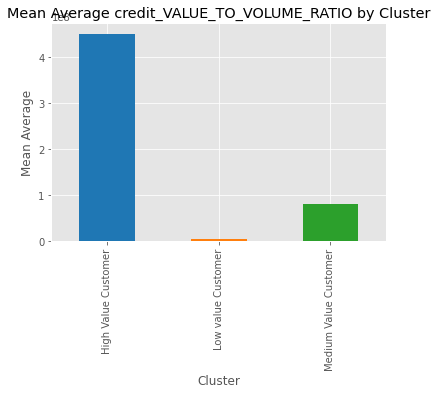

In [214]:
cluster_revenue = merged_df2.groupby('Band_name')['credit_VALUE_TO_VOLUME_RATIO'].mean()

cmap = mcolors.ListedColormap(plt.cm.tab10.colors)

unique_clusters = merged_df2['Band_name'].unique()
color_dict = {cluster: cmap(idx) for idx, cluster in enumerate(unique_clusters)}

cluster_revenue.plot(kind='bar', color=[color_dict[cluster] for cluster in unique_clusters])

plt.xlabel('Cluster')
plt.ylabel('Mean Average')
plt.title('Mean Average credit_VALUE_TO_VOLUME_RATIO by Cluster')
plt.show()


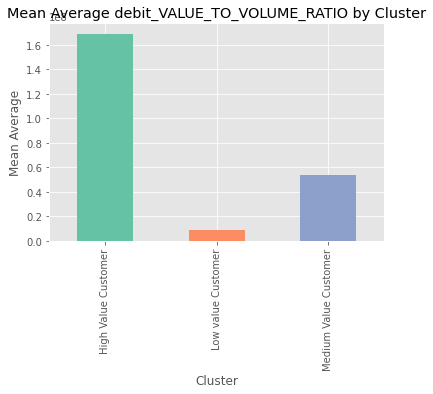

In [215]:

cluster_revenue = merged_df2.groupby('Band_name')['debit_VALUE_TO_VOLUME_RATIO'].mean()

cmap = mcolors.ListedColormap(plt.cm.Set2.colors)

unique_clusters = merged_df2['Band_name'].unique()
color_dict = {cluster: cmap(idx) for idx, cluster in enumerate(unique_clusters)}

cluster_revenue.plot(kind='bar', color=[color_dict[cluster] for cluster in unique_clusters])

plt.xlabel('Cluster')
plt.ylabel('Mean Average')
plt.title('Mean Average debit_VALUE_TO_VOLUME_RATIO by Cluster')
plt.show()


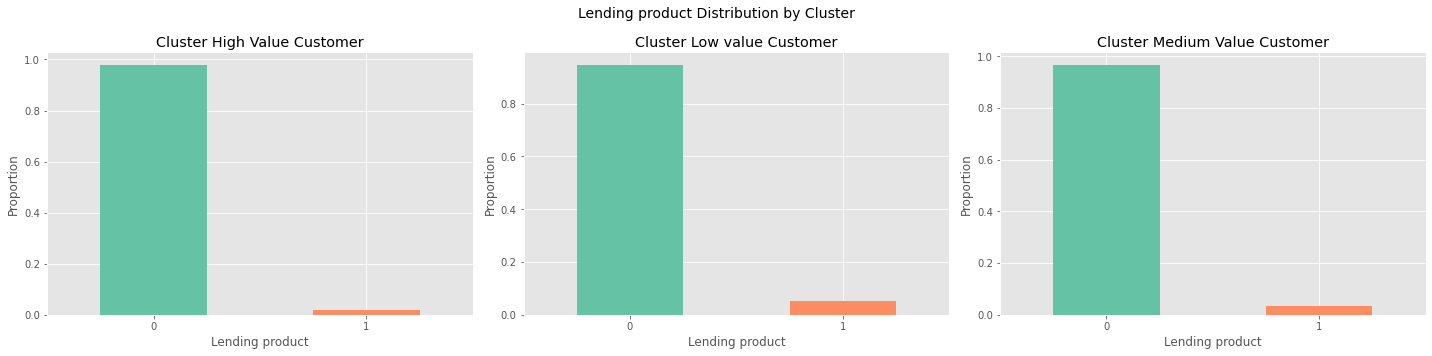

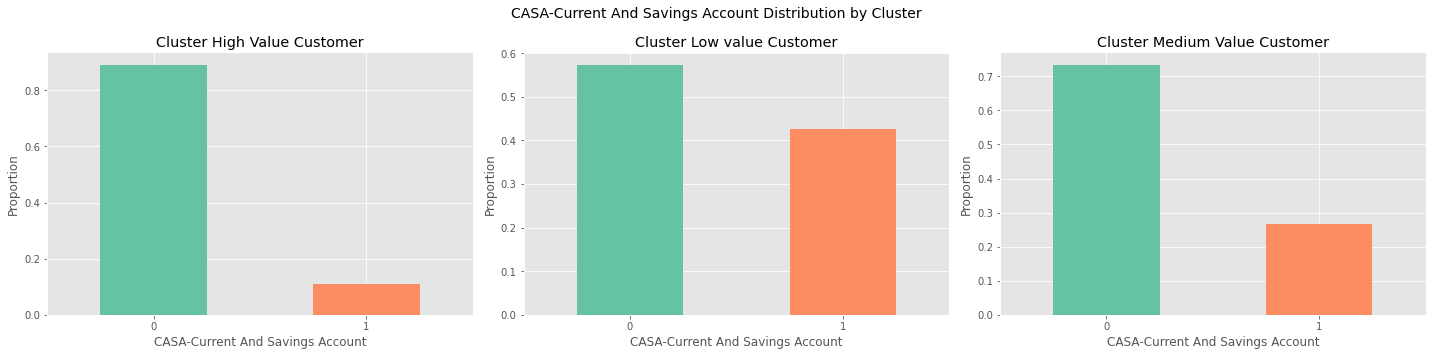

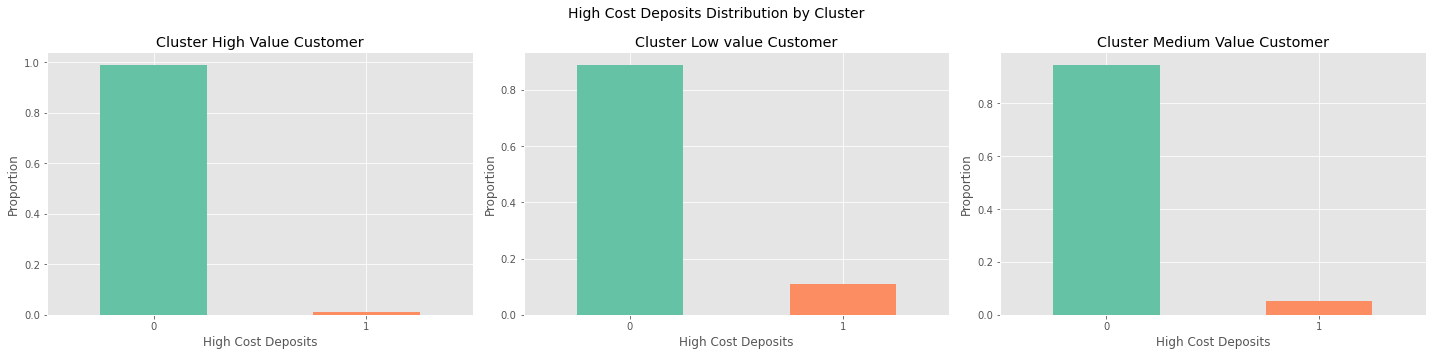

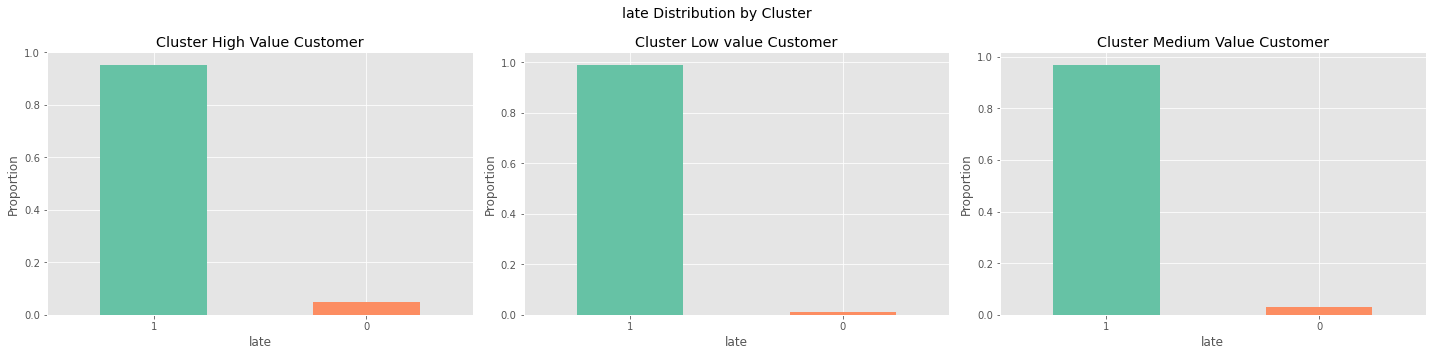

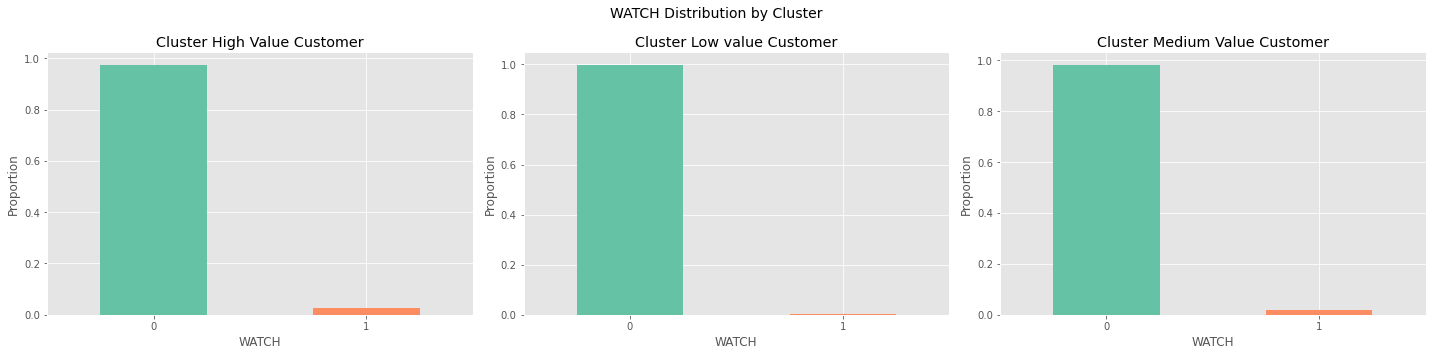

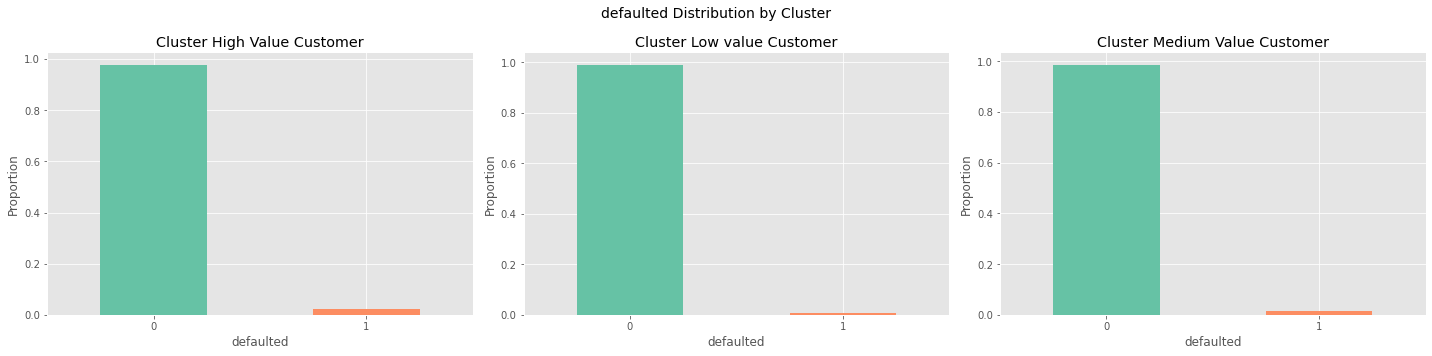

In [217]:


binary_cols = merged_df2.select_dtypes(include=[np.number]).columns[(merged_df2.select_dtypes(include=[np.number]).min() == 0) & (merged_df2.select_dtypes(include=[np.number]).max() == 1)]

cmap = mcolors.ListedColormap(plt.cm.Set2.colors)

for col in binary_cols:
    fig, axes = plt.subplots(nrows=1, ncols=len(merged_df2['Band_name'].unique()), figsize=(20,5))
    fig.suptitle(col + " Distribution by Cluster", fontsize=14)
    
    for i, cluster in enumerate(merged_df2['Band_name'].unique()):
        ax = axes[i]
        unique_values = merged_df2[col].unique()
        color_dict = {value: cmap(idx) for idx, value in enumerate(unique_values)}
        
        merged_df2[merged_df2['Band_name']==cluster][col].value_counts(normalize=True).plot(kind='bar', ax=ax, rot=0, color=[color_dict[val] for val in unique_values])
        
        ax.set_xlabel(col)
        ax.set_ylabel('Proportion')
        ax.set_title('Cluster ' + str(cluster))
    plt.tight_layout()
    plt.show()


In [ ]:
#check revenue on different products

In [309]:
# df_grouped = merged_df2.groupby(["Band_name", "default_status", "CUSTOMER_SECTOR"])["CIF_ID"].nunique().to_frame("cnt_acs").reset_index()

# sbu_counts = df_grouped["Band_name"].value_counts()
# sbu_filter = sbu_counts[sbu_counts >= 5].index

# for sbu in sbu_filter:
#     sbu_df = df_grouped[df_grouped["Band_name"] == sbu]
#     table = pd.pivot_table(sbu_df, values="cnt_acs", index="CUSTOMER_SECTOR", columns="default_status", fill_value=0)

#     fig, ax = plt.subplots(figsize=(10, 10))
#     table.plot(kind="barh", stacked=True, ax=ax)

  
#     ax.set_xlabel("count of Unique CIF IDs")
#     ax.set_ylabel("Customer Sector")
#     ax.set_title(f"Distribution of Customer Sectors by repayment for {sbu}")
#     ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

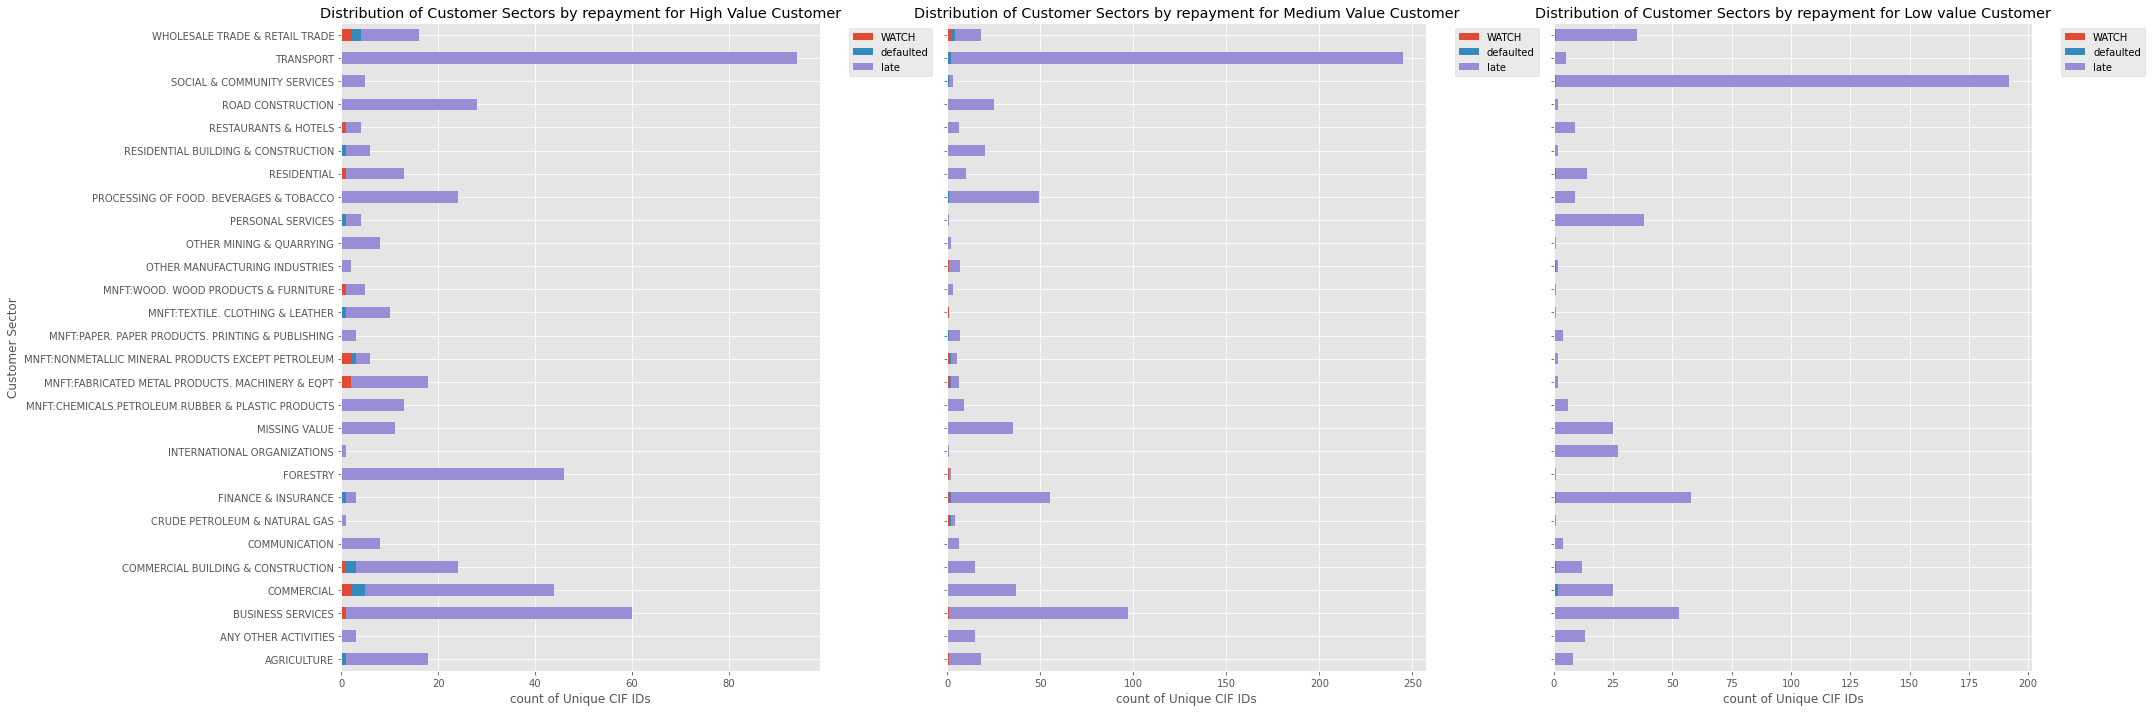

In [220]:
sbu_counts = df_grouped["Band_name"].value_counts()
sbu_filter = sbu_counts[sbu_counts >= 5].index

# Determine the number of rows and columns for the subplots
nrows = 1
ncols = len(sbu_filter)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 10, 10), sharey=True)

for idx, sbu in enumerate(sbu_filter):
    sbu_df = df_grouped[df_grouped["Band_name"] == sbu]
    table = pd.pivot_table(sbu_df, values="cnt_acs", index="CUSTOMER_SECTOR", columns="default_status", fill_value=0)

    ax = axes[idx]
    table.plot(kind="barh", stacked=True, ax=ax)
    
    ax.set_xlabel("count of Unique CIF IDs")
    ax.set_ylabel("Customer Sector")
    ax.set_title(f"Distribution of Customer Sectors by repayment for {sbu}")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [223]:
merged_df2.describe()

,AVERAGE_MONTHLY_BALANCE_rank,Total Revenue_rank,credit_VALUE_TO_VOLUME_RATIO_rank,debit_VALUE_TO_VOLUME_RATIO_rank,Score,cluster Band,NUMBEROFACCOUNTS,TOTAL_CREDIT_VALUE,TOTAL_DEBIT_VALUE,MONTHLY_DEBIT_MEDIAN_VALUE,...,CASA-Current And Savings Account,High Cost Deposits,nan,late,WATCH,defaulted,TOTAL_CREDIT_VALUE_zscore,AVERAGE_MONTHLY_BALANCE_zscore,credit_VALUE_TO_VOLUME_RATIO,debit_VALUE_TO_VOLUME_RATIO
count,"2,391.00","2,391.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00",...,"2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00","2,412.00"
mean,50.02,50.02,50.02,50.02,199.22,0.91,3.64,"813,666,379.47","828,948,529.17","20,444,881.21",...,0.28,0.06,0.00,0.97,0.01,0.01,-0.06,-0.04,"152,878,953.04","69,627,472.60"
std,28.47,28.87,27.84,28.38,73.32,0.85,7.59,"3,205,945,859.42","3,249,737,908.56","107,448,699.86",...,0.45,0.24,0.00,0.17,0.12,0.12,0.23,0.25,"770,414,720.38","269,307,814.58"
min,15.16,3.81,20.63,16.23,37.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.12,-0.12,0.00,0.00
25%,15.16,25.03,20.63,16.23,145.00,0.00,1.00,"714,639.99","102,301.57",0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,-0.12,-0.12,0.00,0.00
50%,50.02,50.02,50.02,50.02,198.00,1.00,2.00,"18,544,371.93","15,057,194.78","170,412.96",...,0.00,0.00,0.00,1.00,0.00,0.00,-0.12,-0.11,"1,307,922.67","3,527,456.44"
75%,75.01,75.01,75.01,75.01,253.00,2.00,4.00,"275,242,143.46","276,569,053.79","3,529,326.62",...,1.00,0.00,0.00,1.00,0.00,0.00,-0.10,-0.06,"51,095,698.34","29,720,803.83"
max,100.00,100.00,100.00,100.00,384.00,2.00,225.00,"39,775,345,027.13","40,542,513,881.98","2,403,263,032.77",...,1.00,1.00,0.00,1.00,1.00,1.00,2.75,2.93,"19,887,672,513.56","4,502,598,293.02"


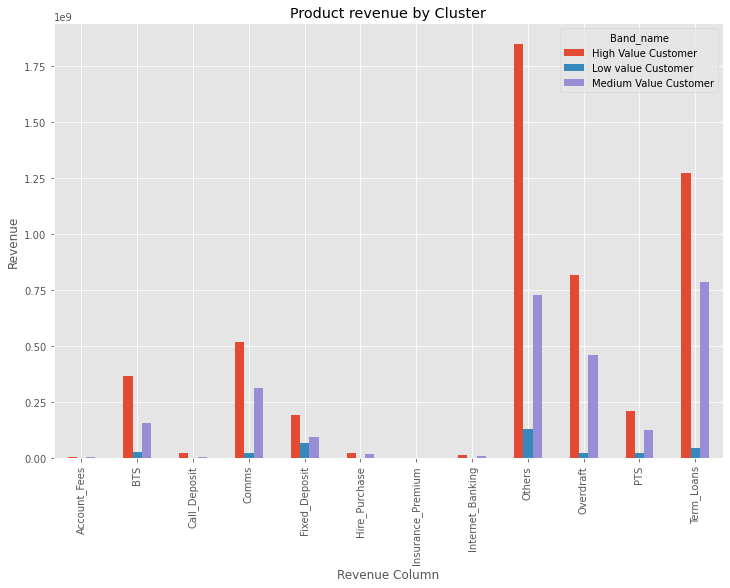

In [225]:
revenue_cols = list(set(['Account_Fees',
 'BTS',
 'Call_Deposit',
 'Comms',
 'Fixed_Deposit',
 'Hire_Purchase',
 'Insurance_Premium',
 'Internet_Banking',
 'Others',
 'Overdraft',
 'PTS',
 'Term_Loans']))

df_selected = merged_df2[['Band_name'] + revenue_cols]

spending_patterns_melt = pd.melt(df_selected, id_vars=['Band_name'], value_vars=revenue_cols, var_name='variable', value_name='Revenue')

spending_patterns1 = spending_patterns_melt.groupby(['Band_name', 'variable'])['Revenue'].sum().reset_index()

spending_patterns_pivot = spending_patterns1.pivot(index='variable', columns='Band_name', values='Revenue')

spending_patterns_pivot.plot(kind='bar', figsize=(12,8))
plt.title('Product revenue by Cluster')
plt.xlabel('Revenue Column')
plt.ylabel('Revenue')
plt.show()


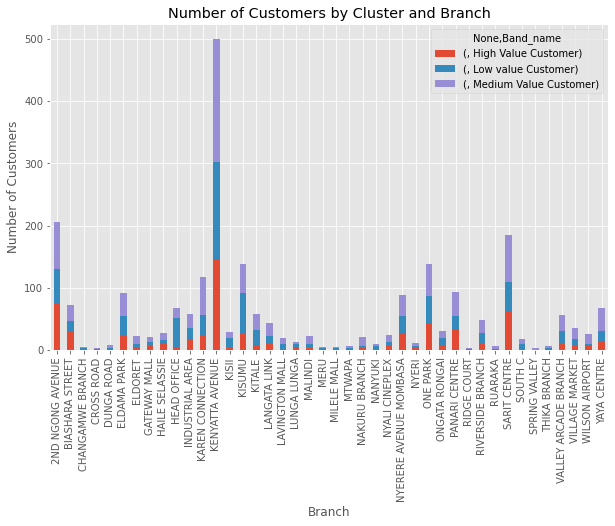

In [226]:
cluster_counts = merged_df2.groupby(['SOL_DESC', 'Band_name'])['Band_name'].count().reset_index(name='')
cluster_counts.set_index(['SOL_DESC', 'Band_name'], inplace=True)
cluster_counts = cluster_counts.unstack(level=-1)

cluster_counts = cluster_counts.fillna(0)


cluster_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Branch')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Cluster and Branch')
plt.show()

In [227]:

df_grouped = merged_df2.groupby("Band_name")["CIF_ID"].nunique().to_frame("cnt_acs").reset_index()

df_grouped = df_grouped.sort_values(by="cnt_acs", ascending=False).reset_index(drop=True)


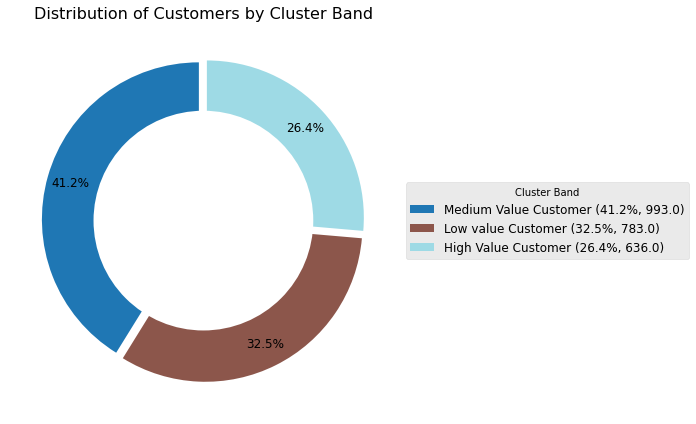

In [228]:
sizes = df_grouped["cnt_acs"]
labels = [f"{k} ({v:.1f}%, {p:.1f})" for k, v, p in zip(df_grouped["Band_name"], 100*df_grouped["cnt_acs"]/df_grouped["cnt_acs"].sum(), df_grouped["cnt_acs"])]

cmap = plt.get_cmap("tab20")
colors = cmap(np.linspace(0, 1, len(sizes)))

explode_values = [0.03] * len(sizes)

fig, ax = plt.subplots(figsize=(10, 6))
wedges, text, autotexts = ax.pie(sizes, colors=colors, autopct='%0.1f%%', startangle=90, pctdistance=0.85, explode=explode_values)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

for t in text:
    t.set_fontsize(12)
for at in autotexts:
    at.set_fontsize(12)

ax.set_title("Distribution of Customers by Cluster Band", fontsize=16)
ax.legend(wedges, labels, title="Cluster Band", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

plt.tight_layout()
plt.show()


In [230]:
df_grouped_stats = merged_df2.groupby("Band_name").agg(["mean", "median", "std"])


Text(0.5, 1.0, 'Average Revenue by Product Type and Cluster Band')

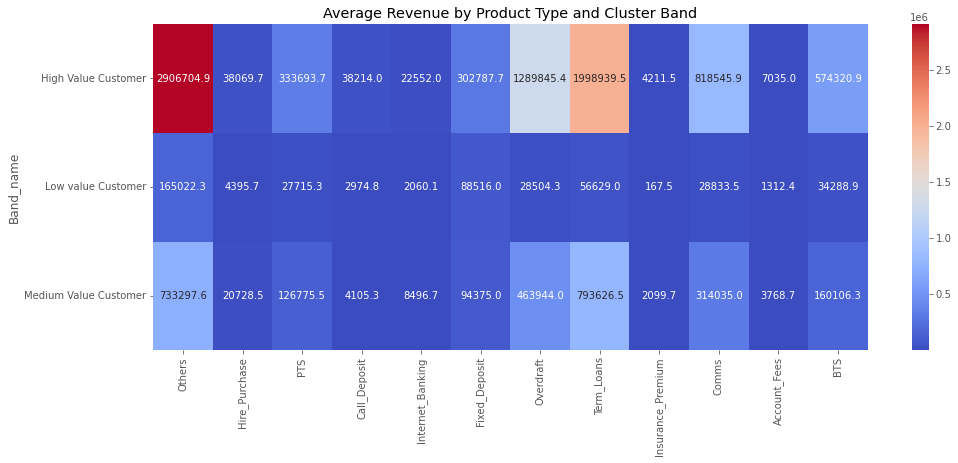

In [231]:
revenue_by_product = merged_df2.groupby('Band_name')[revenue_cols].mean()

# hmp
plt.figure(figsize=(16, 6))
sns.heatmap(revenue_by_product, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Average Revenue by Product Type and Cluster Band")


In [317]:
revenue_by_product = merged_df2.groupby('Band_name')[revenue_cols].mean()

# Round the values to 1 decimal place
revenue_by_product_rounded = revenue_by_product.round(1)

# Display the table
revenue_by_product_rounded.T


Band_name,High Value Customer,Low value Customer,Medium Value Customer
Others,"2,906,704.90","165,022.30","733,297.60"
Hire_Purchase,"38,069.70","4,395.70","20,728.50"
PTS,"333,693.70","27,715.30","126,775.50"
Call_Deposit,"38,214.00","2,974.80","4,105.30"
Internet_Banking,"22,552.00","2,060.10","8,496.70"
Fixed_Deposit,"302,787.70","88,516.00","94,375.00"
Overdraft,"1,289,845.40","28,504.30","463,944.00"
Term_Loans,"1,998,939.50","56,629.00","793,626.50"
Insurance_Premium,"4,211.50",167.50,"2,099.70"
Comms,"818,545.90","28,833.50","314,035.00"


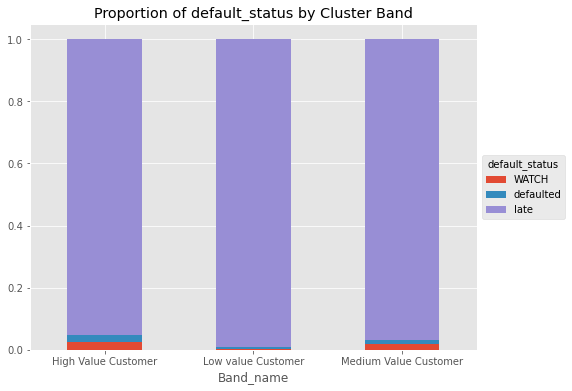

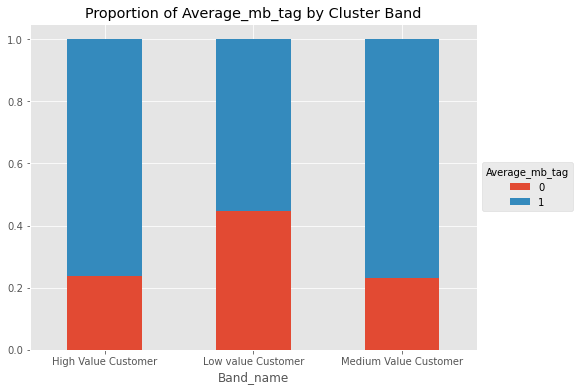

In [340]:
def plot_stacked_bar(feature):
    stacked_data = merged_df2.groupby(['Band_name', feature]).size().unstack()
    stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)
    stacked_data.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f"Proportion of {feature} by Cluster Band")
    plt.legend(title=feature, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=0)
    plt.show()

plot_stacked_bar('default_status')
plot_stacked_bar('Average_mb_tag')


In [235]:

product_penetration = merged_df2.groupby("Band_name")[revenue_cols].mean()


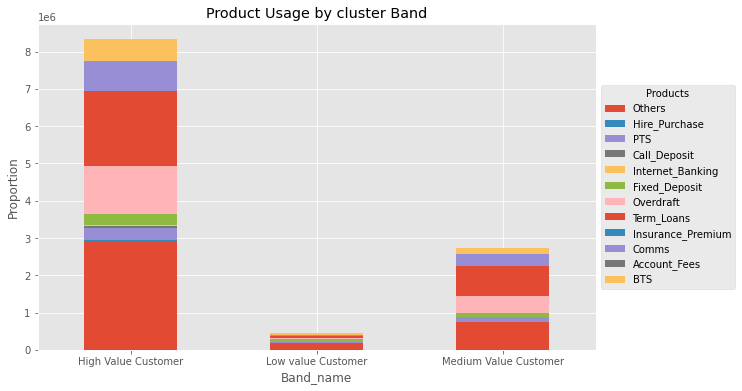

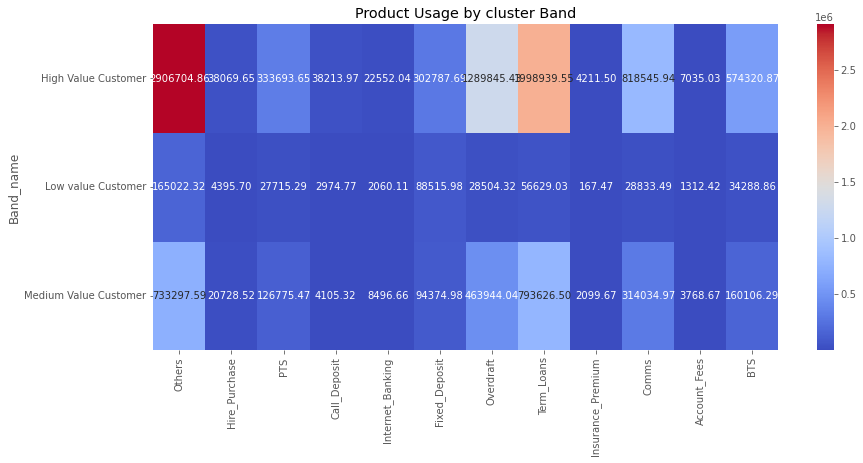

In [237]:
# Bp
ax = product_penetration.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_ylabel("Proportion")
ax.set_title("Product Usage by cluster Band")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Products")
plt.show()

# Hm
plt.figure(figsize=(14, 6))
sns.heatmap(product_penetration, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Product Usage by cluster Band")
plt.show()


In [238]:
branch_customer_counts = merged_df2.groupby(["SOL_DESC", "Band_name"]).size().unstack().fillna(0)


In [239]:
branch_customer_proportions = branch_customer_counts.div(branch_customer_counts.sum(axis=1), axis=0)


In [311]:

# ax = branch_customer_proportions.plot(kind="bar", stacked=True, figsize=(15, 6))
# ax.set_ylabel("Proportion")
# ax.set_title("Proportion of Customers by Branch and Cluster Band")
# plt.xticks(rotation=90)
# plt.legend(title="Cluster Band", loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()


In [241]:
sorted_df = merged_df2.sort_values(by=["Band_name", "Total Revenue"], ascending=[True, False])


In [242]:
sorted_df["cumulative_revenue"] = sorted_df.groupby("Band_name")["Total Revenue"].cumsum()


In [243]:
total_revenue_by_cluster = sorted_df.groupby("Band_name")["Total Revenue"].sum()


In [ ]:
# sorted_df["cumulative_revenue_prop"] = sorted_df.apply(
#     lambda x: x["cumulative_revenue"] / total_revenue_by_cluster.loc[x["cluster Band"]],
#     axis=1,
# )


In [ ]:
#Identify the proportion of total revenue contributed by the top 10%, 20%, and 50% of customers within each cluster:

In [ ]:
# total_revenue_by_cluster = merged_df.groupby("Band_name")["Total Revenue"].sum()


In [ ]:
# ax = total_revenue_by_cluster.plot(kind="bar", colormap="Set2", figsize=(10, 6))
# ax.set_ylabel("Total Revenue")
# ax.set_title("Total Revenue by Cluster Band")
# plt.xticks(rotation=0)
# plt.show()


In [ ]:
# product_columns = [
#     'fixed_deposit',
#     'other',
#     'AGENCY',
#     'hirepurchase',
#     'ASSET FINANCE',
#     'term_loan',
#     'short_term_loan',
#     'OVERDRAFT',
# ]


In [ ]:
# sector_product_usage = merged_df.groupby('Band_name')[product_columns].mean()


In [ ]:

# plt.figure(figsize=(12, 8))
# sns.heatmap(sector_product_usage, cmap="coolwarm", annot=True, fmt=".2f")
# plt.title("Product Usage by cluster Band")
# plt.xlabel("Product")
# plt.ylabel("Customer Sector")
# plt.show()


In [245]:
def get_revenue_concentration(merged_df2, cluster, percentile):
    cutoff = int(len(merged_df2[merged_df2["Band_name"] == cluster]) * percentile)
    concentration = merged_df2[merged_df2["Band_name"] == cluster]["Total Revenue"].iloc[cutoff]
    return concentration

revenue_concentration = {
    cluster: {
        f"Top {int(100 * p)}%": get_revenue_concentration(merged_df2, cluster, p)
        for p in [0.1, 0.2, 0.5]
    }
    for cluster in merged_df2["Band_name"].unique()
}

revenue_concentration_df = pd.DataFrame(revenue_concentration).T


In [247]:
# define the bands for our age groups
age_groups = [0, 11, 17, 25, 35, 45, 55, 65, 115]

# labels for the bands
age_group_names = ['<11', '11-17', '17-25', '25-35', '35-45', '45-55', '55-65', '>65']

In [248]:
merged_df2['Age_group'] = pd.cut(
    merged_df2['COMPANY_AGE'], bins=age_groups, labels=age_group_names)



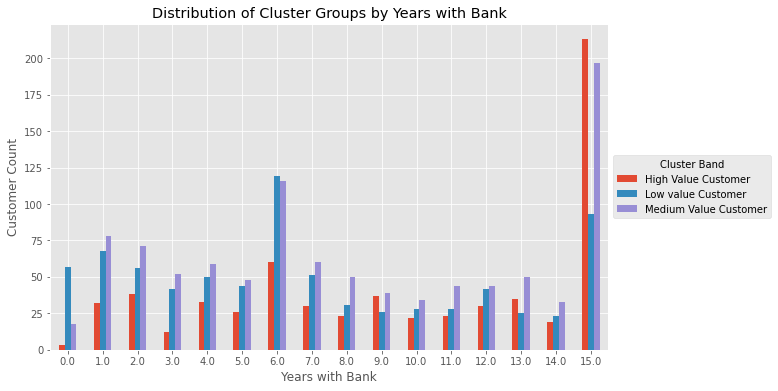

In [249]:

grouped_data = merged_df2.groupby(['YEARS_WITH_BANK', 'Band_name'])['CIF_ID'].nunique().reset_index()
grouped_data.columns = ['Years with Bank', 'Band_name', 'Customer Count']


pivot_data = grouped_data.pivot_table(index='Years with Bank', columns='Band_name', values='Customer Count', fill_value=0)


ax = pivot_data.plot(kind="bar", figsize=(10, 6))
ax.set_ylabel("Customer Count")
ax.set_title("Distribution of Cluster Groups by Years with Bank")
plt.xticks(rotation=0)
plt.legend(title="Cluster Band", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
pivot_data

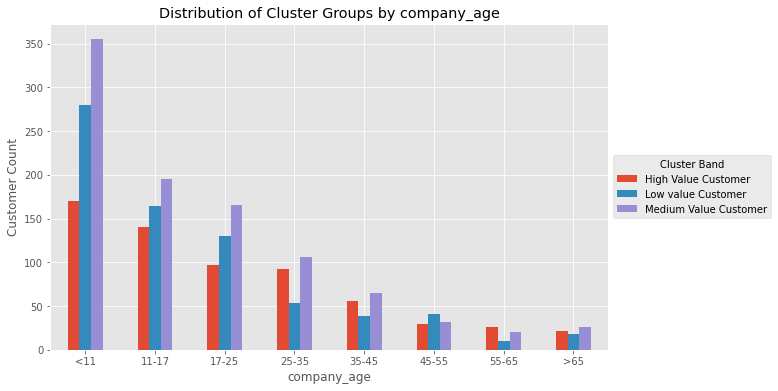

In [250]:

grouped_data = merged_df2.groupby(['Age_group', 'Band_name'])['CIF_ID'].nunique().reset_index()
grouped_data.columns = ['company_age', 'Band_name', 'Customer Count']

pivot_data2 = grouped_data.pivot_table(index='company_age', columns='Band_name', values='Customer Count', fill_value=0)


ax = pivot_data2.plot(kind="bar", figsize=(10, 6))
ax.set_ylabel("Customer Count")
ax.set_title("Distribution of Cluster Groups by company_age")
plt.xticks(rotation=0)
plt.legend(title="Cluster Band", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



# FOR ppt

In [251]:
merged_df2['Band_name'].value_counts()

Medium Value Customer    993
Low value Customer       783
High Value Customer      636
Name: Band_name, dtype: int64

In [278]:
merged_df.loc[merged_df.Band_name == 'Medium Value Customer']['Total Revenue'].sum()

2627140861.6000004

In [338]:
merged_df2.T

,0,1,2,3,4,5,6,7,8,9,...,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411
CIF_ID,0001031,0001038,0001046,0001055,0001062,0001063,0001068,0001069,0001134,0001179,...,0378734,0378819,0378960,0378987,0379324,0379354,0379384,0379480,8000046,8000047
AVERAGE_MONTHLY_BALANCE_rank,15.16,15.16,34.46,53.20,76.87,98.95,66.16,41.82,96.36,86.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Revenue_rank,95.78,97.07,25.47,42.62,68.21,99.04,35.63,31.74,85.61,89.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_VALUE_TO_VOLUME_RATIO_rank,71.48,88.85,20.63,80.97,89.76,55.72,92.70,20.63,20.63,77.61,...,20.63,20.63,41.67,20.63,20.63,43.74,20.63,20.63,20.63,20.63
debit_VALUE_TO_VOLUME_RATIO_rank,73.51,81.67,50.46,90.75,92.21,63.81,91.38,16.23,66.00,90.55,...,16.23,16.23,16.23,16.23,16.23,32.63,16.23,16.23,16.23,16.23
Score,256.00,283.00,131.00,268.00,327.00,318.00,286.00,110.00,269.00,344.00,...,37.00,37.00,58.00,37.00,37.00,76.00,37.00,37.00,37.00,37.00
cluster Band,1,1,2,1,1,1,1,2,1,1,...,2,2,2,2,2,2,2,2,2,2
SOL_DESC,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,KENYATTA AVENUE,...,ONE PARK,HEAD OFFICE,INDUSTRIAL AREA,2ND NGONG AVENUE,ONE PARK,HAILE SELASSIE,NYERERE AVENUE MOMBASA,ONE PARK,HEAD OFFICE,HEAD OFFICE
CUSTOMER_SECTOR,MNFT:PAPER. PAPER PRODUCTS. PRINTING & PUBLISHING,PROCESSING OF FOOD. BEVERAGES & TOBACCO,MNFT:TEXTILE. CLOTHING & LEATHER,MNFT:PAPER. PAPER PRODUCTS. PRINTING & PUBLISHING,MNFT:TEXTILE. CLOTHING & LEATHER,PERSONAL SERVICES,MNFT:PAPER. PAPER PRODUCTS. PRINTING & PUBLISHING,SOCIAL & COMMUNITY SERVICES,MNFT:CHEMICALS.PETROLEUM.RUBBER & PLASTIC PROD...,PERSONAL SERVICES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING VALUE,MISSING VALUE
NUMBEROFACCOUNTS,18,19,2,2,4,6,10,1,4,17,...,2,1,2,1,2,1,3,2,1,1


In [339]:
merged_df2.to_csv('segment.csv', index=False)

In [280]:
merged_df.loc[merged_df.Band_name == 'High Value Customer']['Total Revenue'].sum()

5191837503.610001

In [281]:
merged_df.loc[merged_df.Band_name == 'Low value Customer']['Total Revenue'].sum()

341828486.03000003

In [271]:
merged_df['Total Revenue'].sum()

8160806851.240001

In [305]:
x = merged_df.loc[merged_df.Band_name == 'High Value Customer']

In [306]:
x.loc[x.MAX_LOAN_AMT >0]['default_status'].value_counts()

late         131
WATCH         16
defaulted     14
Name: default_status, dtype: int64

In [307]:
x.MAX_LOAN_AMT.sum()

27984024827.159996

In [308]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
AVERAGE_MONTHLY_BALANCE_rank,636.00,69.53,25.96,15.16,57.56,77.37,89.77,99.92
Total Revenue_rank,636.00,71.97,18.87,3.81,59.54,74.30,86.92,100.00
credit_VALUE_TO_VOLUME_RATIO_rank,636.00,75.97,19.22,20.63,65.74,79.33,90.85,100.00
debit_VALUE_TO_VOLUME_RATIO_rank,636.00,75.32,18.00,16.23,63.14,78.79,89.75,99.96
Score,636.00,292.80,31.60,249.00,267.00,285.00,312.00,384.00
cluster Band,636.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
NUMBEROFACCOUNTS,636.00,5.89,11.59,1.00,2.00,3.00,6.00,225.00
TOTAL_CREDIT_VALUE,636.00,"2,281,963,810.72","5,344,508,475.20","44,428.48","88,715,622.28","401,690,391.67","1,735,984,758.62","39,775,345,027.13"
TOTAL_DEBIT_VALUE,636.00,"2,323,522,981.58","5,375,227,862.70",0.00,"82,374,895.55","405,217,393.94","1,849,791,916.82","39,542,962,699.10"
MONTHLY_DEBIT_MEDIAN_VALUE,636.00,"50,636,559.55","170,974,258.97",0.00,"720,938.95","4,609,760.65","27,821,807.21","2,403,263,032.77"


In [ ]:
df_comb.loc[df_comb.Band_name == 'High Value Customer'].describe().T

In [ ]:
df_comb.AVERAGE_MONTHLY_BALANCE.sum()